# Задание 3. Разработка среды для обучения RL-агентов

# Подзадачи

**1. Анализ игры и определение области действий и состояний.** Вы анализируете выбранную игру и определяете пространства действий и состояний, которые будут использованы в среде обучения. Это включает понимание правил игры, возможных действий агента и состояний, которые могут возникнуть в игре.

**2. Разработка среды обучения Gym.** Вы имеете навыки программирования и понимание, как создать среду обучения, совместимую с библиотекой Gym. Это включает определение методов, таких как step, reset, render, а также хранение и управление внутренним состоянием среды.

**3. Разработка бейзлайн-решения.** Вы выбираете один или два алгоритма обучения с подкреплением, которые были рассмотрены в курсе, и применяете их к разработанной среде. Это включает настройку гиперпараметров, выбор подходящей модели и обучение агента.

**4. Анализ и визуализация результатов.** Вы проводите анализ результатов, строите кривые обучения и визуализируете поведение агента в среде, чтобы демонстрировать, как агент обучается и как он взаимодействует со средой.

# Состав проекта

В проект должны входить:

1. Описание предложенной среды в формате MDP.
2. Код среды Gym или Gymnasium с реализованными методами reset, step или render.
3. Код бейзлайнов, демонстрирующих возможность обучения в среде.
4. Графики обучения, демонстрирующие сходимость алгоритмов в реализованной среде.

# Критерии оценки

**1. Реализация среды (20 баллов):**

* Среда исправно инициализируется — 5 баллов.
* Среда взаимодействует с агентом — 5 баллов.
* В среде реализованы визуальные наблюдения — 5 баллов.
* Среда описана в формате MDP — 5 баллов.

**2. Алгоритмы решения (20 баллов):**

* Алгоритмы на среде сходятся — 10 баллов.
* Реализовано 2 метода: хотя бы один из них сходится, а для не сходящихся есть письменная интерпретация причин — 5 баллов.
* Реализовано 3 метода: хотя бы один из них сходится, а для не сходящихся есть письменная интерпретация причин — 5 баллов.

**3. Визуализация и сравнение алгоритмов (20 баллов):**

* Качество визуализации: графики четкие, информативные, и легко сравнимы между собой. Легенды и подписи к осям присутствуют и читаемы — 10 баллов.
* Глубина анализа: построенные визуализации помогают сформулировать выводы; данные визуализаций используются для обоснования предположений — 10 баллов.

**4. Выводы по результатам экспериментов (20 баллов):**

* Ясность и структурированность: Выводы четко сформулированы, логически структурированы и подкреплены данными из экспериментов — 10 баллов.
* Обоснованность выводов: есть критическая оценка собственной работы и обоснования предположений данными экспериментов — 10 баллов.

**5. Код или тетрадка для воспроизведения результатов (20 баллов):**

* Читаемость и организация кода: код хорошо организован, читаем и снабжен комментариями, объясняющими ключевые части логики — 10 баллов.
* Воспроизводимость результатов: предоставленные материалы позволяют без труда воспроизвести результаты экспериментов, включая установку необходимых зависимостей — 10 баллов.

## Импорт определенных версий библиотек и загрузка исходных данных для pygame

In [1]:
# !pip install numpy==1.24.1
!pip install numpy==1.25.0
!pip install gym==0.25.2
!pip install -q d3rlpy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.9 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [2]:
import pygame
import os
import random
import numpy as np
import gym
from gym import spaces
import datetime
import matplotlib.pyplot as plt
import d3rlpy
# from d3rlpy.envs import GymEnv

# Клонирование репозитория
!git clone https://github.com/BogdanKostiuk93/Flappy-Bird-RL.git

# Загрузка изображений
img_folder = '/content/Flappy-Bird-RL/imgs'
BIRD_IMGS = [pygame.transform.scale2x(pygame.image.load(os.path.join(img_folder,"bird1.png"))),
            pygame.transform.scale2x(pygame.image.load(os.path.join(img_folder,"bird2.png"))),
            pygame.transform.scale2x(pygame.image.load(os.path.join(img_folder,"bird3.png")))]

PIPE_IMG = pygame.transform.scale2x(pygame.image.load(os.path.join(img_folder,"pipe.png")))
BASE_IMG = pygame.transform.scale2x(pygame.image.load(os.path.join(img_folder,"base.png")))
BG_IMG = pygame.transform.scale2x(pygame.image.load(os.path.join(img_folder,"bg.png")))

# Инициализация шрифта
pygame.font.init()
STAT_FONT = pygame.font.SysFont("comicsans", 50)

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
Cloning into 'Flappy-Bird-RL'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 34 (delta 11), reused 31 (delta 8), pack-reused 0
Receiving objects: 100% (34/34), 45.37 KiB | 455.00 KiB/s, done.
Resolving deltas: 100% (11/11), done.


## Enable pygame

In [3]:
# set SDL to use the dummy NULL video driver,
#   so it doesn't need a windowing system.
os.environ["SDL_VIDEODRIVER"] = "dummy"

## Составные классы

Реализовано 2 вида лкасса птица - тот, в котором упрвление идет через вертикальную скорость - BirdWithVelocity и базовый Bird. В основном решении использовался базовый класс.
Класс Pipe реализован в единственно экземпляре.

In [9]:
class Bird():
  IMGS = BIRD_IMGS
  # MAX_ROTATION = 25
  # ROT_VEL = 20
  # ANIMATION_TIME = 5

  def __init__(self, x, y,MAX_ROTATION = 25,ROT_VEL = 20,ANIMATION_TIME = 5,JUMP_VEL=-10.5,GRAVITY=1.5):
    self.x = x
    self.y = y
    self.tilt = 0
    self.tick_count = 0
    self.vel = 0
    self.height = self.y
    self.img_count = 0
    self.img = self.IMGS[0]
    self.MAX_ROTATION=MAX_ROTATION
    self.ROT_VEL=ROT_VEL
    self.ANIMATION_TIME=ANIMATION_TIME
    self.JUMP_VEL = JUMP_VEL
    self.GRAVITY = GRAVITY


  def jump(self):
    self.vel = self.JUMP_VEL # вверх - отрицательая скорость
    self.tick_count = 0
    self.height = self.y

  def move(self):
    self.tick_count += 1

    d = self.vel*self.tick_count + self.GRAVITY*self.tick_count**2

    if d >= 16:
      d = 16

    if d < 0:
      d -= 2

    self.y = self.y + d

    if d < 0 or self.y < self.height + 50:
      if self.tilt < self.MAX_ROTATION:
        self.tilt = self.MAX_ROTATION

    elif self.tilt > -90: #tilt down
        self.tilt -= self.ROT_VEL

  def draw(self, win):
    self.img_count += 1

    if self.img_count <= self.ANIMATION_TIME:
      self.img = self.IMGS[0]
    elif self.img_count <= self.ANIMATION_TIME*2:
      self.img = self.IMGS[1]
    elif self.img_count <= self.ANIMATION_TIME*3:
      self.img = self.IMGS[2]
    elif self.img_count <= self.ANIMATION_TIME*4:
      self.img = self.IMGS[1]
    elif self.img_count == self.ANIMATION_TIME*4 + 1:
      self.img = self.IMGS[0]
      self.img_count = 0

    if self.tilt <= -80:
      self.img = self.IMGS[1]
      self.img_count = self.ANIMATION_TIME*2

    rotated_image = pygame.transform.rotate(self.img, self.tilt)
    new_rect = rotated_image.get_rect(center = self.img.get_rect(topleft = (self.x, self.y)).center)
    win.blit(rotated_image, new_rect.topleft)

  def get_mask(self):
    return pygame.mask.from_surface(self.img)


class Pipe:
  # GAP = 250
  # VEL = 5

  def __init__(self, x, VEL=5, GAP=250):
    self.x = x
    self.height = 0
    self.GAP = GAP
    self.VEL = VEL


    self.top = 0
    self.bottom = 0
    self.PIPE_TOP = pygame.transform.flip(PIPE_IMG, False, True)
    self.PIPE_BOTTOM = PIPE_IMG

    self.passed = False
    self.set_height()

  def set_height(self):
    self.height = random.randrange(50,450)
    self.top = self.height - self.PIPE_TOP.get_height()
    self.bottom = self.height + self.GAP

  def move(self):
    self.x -= self.VEL

  def draw(self,win):
    win.blit(self.PIPE_TOP, (self.x,self.top))
    win.blit(self.PIPE_BOTTOM, (self.x, self.bottom))

  def collide(self,bird):
    bird_mask = bird.get_mask()
    top_mask = pygame.mask.from_surface(self.PIPE_TOP)
    bottom_mask = pygame.mask.from_surface(self.PIPE_BOTTOM)

    top_offset = (self.x - bird.x, self.top - round(bird.y))
    bottom_offset = (self.x - bird.x, self.bottom - round(bird.y))

    b_point = bird_mask.overlap(bottom_mask,bottom_offset)
    t_point = bird_mask.overlap(top_mask,top_offset)

    if t_point or b_point:
      return True
    return False

def draw_window(win, bird, pipes, score, WIN_WIDTH):
  win.blit(BG_IMG, (0,0))

  for pipe in pipes:
    pipe.draw(win)

  text = STAT_FONT.render(f'Score {score}',1,(255,255,255))
  win.blit(text, (WIN_WIDTH - 10 - text.get_width(),10))

  bird.draw(win)
  pygame.display.update()



class BirdWithVelocity(Bird):
    def __init__(self, x, y, MAX_ROTATION=25, ROT_VEL=20, ANIMATION_TIME=5, JUMP_VEL=-10.5, GRAVITY=1.5):
        super().__init__(x, y, MAX_ROTATION, ROT_VEL, ANIMATION_TIME, JUMP_VEL, GRAVITY)

    def jump(self):
        self.vel = self.JUMP_VEL  # вверх - отрицательая скорость
        self.tick_count = 0
        self.height = self.y

    def move(self):
        self.tick_count += 1

        if self.tick_count > 1:
          # Обновление скорости с учетом гравитации
          self.vel += self.GRAVITY/2 # Приводим гравитацию к обычной физической (внешнюю оставим для совместимости с исторической средой)

        if self.vel >= - self.JUMP_VEL:
          self.vel = -self.JUMP_VEL

        # Обновление положения с учетом скорости
        self.y += self.vel

        # if self.y < 0:
        #     self.y = 0
        #     self.vel = 0

        # if self.y + self.img.get_height() >= WIN_HEIGHT:
        #     self.y = WIN_HEIGHT - self.img.get_height()
        #     self.vel = 0

        # Обновление наклона (tilt) птицы в зависимости от скорости
        if self.vel < 0 or self.y < self.height + 50:
            if self.tilt < self.MAX_ROTATION:
                self.tilt = self.MAX_ROTATION
        elif self.tilt > -90:
            self.tilt -= self.ROT_VEL



## Основной класс

реализовано 2 класса с одинаковой мехникой, но разным пространство наблюдений. Базовый FlappingBirdEnv возвращает изображение. Но алгоритм RL построен на модификации, которая возвращает численные значения значимые для поведения агента.

In [5]:
class FlappingBirdEnv(gym.Env):
    def __init__(self, VEL=5, GAP=250, MAX_ROTATION=25, ROT_VEL=20, ANIMATION_TIME=5, JUMP_VEL=-10.5,
                 GRAVITY=1.5, WIN_WIDTH=500, WIN_HEIGHT=800, FPS=20, logs=True, max_score=200, Bird = Bird, Pipe=Pipe):
        super(FlappingBirdEnv, self).__init__()
        self.WIN_WIDTH = WIN_WIDTH
        self.WIN_HEIGHT = WIN_HEIGHT
        self.FPS = FPS
        self.VEL = VEL
        self.GAP = GAP
        self.MAX_ROTATION = MAX_ROTATION
        self.ROT_VEL = ROT_VEL
        self.ANIMATION_TIME = ANIMATION_TIME
        self.JUMP_VEL = JUMP_VEL
        self.GRAVITY = GRAVITY
        self.logs = logs
        self.max_score = max_score
        self.Bird = Bird
        self.Pipe = Pipe

        self.win = pygame.display.set_mode((self.WIN_WIDTH, self.WIN_HEIGHT))
        pygame.display.set_caption("Flappy Bird")
        self.clock = pygame.time.Clock()

        self.action_space = spaces.Discrete(2)  # 0: do nothing, 1: jump
        self.observation_space = spaces.Box(low=0, high=255, shape=(3, self.WIN_HEIGHT, self.WIN_WIDTH), dtype=np.uint8)

        self.reset()

    def reset(self):
        self.bird = self.Bird(230, 350, self.MAX_ROTATION, self.ROT_VEL, self.ANIMATION_TIME, self.JUMP_VEL, self.GRAVITY)
        self.pipes = [self.Pipe(730, self.VEL, self.GAP)]
        self.score = 0
        self.done = False
        info = {} # Для своместимость с d3rlpy
        return self._get_observation(), info

    def step(self, action):
        if action == 1:
            self.bird.jump()

        self.bird.move()
        rem = []
        add_pipe = False

        for pipe in self.pipes:
            if pipe.collide(self.bird):
                self.done = True

            if pipe.x + pipe.PIPE_TOP.get_width() < 0:
                rem.append(pipe)

            if not pipe.passed and pipe.x < self.bird.x:
                pipe.passed = True
                add_pipe = True

            pipe.move()

        if add_pipe:
            self.score += 1
            self.pipes.append(Pipe(600, self.VEL, self.GAP))

        for r in rem:
            self.pipes.remove(r)

        if self.bird.y + self.bird.img.get_height() >= self.WIN_HEIGHT or self.bird.y < 0:
            self.done = True

        if self.score >= self.max_score:
            self.done = True

        observation = self._get_observation()

        reward = 0.001
        if not self.done and add_pipe:
          reward = 1

        info = {"score": self.score}

        if self.done and self.logs:
            self._log_game_result()


        truncated = False #Для совместимости с d3rply

        # self.render()


        return observation, reward, self.done, truncated, info

    def render(self):
        draw_window(self.win, self.bird, self.pipes, self.score, self.WIN_WIDTH)
        self.clock.tick(self.FPS)

    def _get_observation(self):
        obs = np.array(pygame.surfarray.pixels3d(self.win)).transpose((2, 1, 0))
        return obs

    def _log_game_result(self):
        timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        with open("games_played.txt", "a") as f:
            f.write(f"{timestamp}\t{self.score}\n")

    def close(self):
        pygame.quit()


class FlappingBirdEnvNumerical(FlappingBirdEnv):
    def __init__(self, VEL=5, GAP=250, MAX_ROTATION=25, ROT_VEL=20, ANIMATION_TIME=5, JUMP_VEL=-10.5,
                 GRAVITY=1.5, WIN_WIDTH=500, WIN_HEIGHT=800, FPS=20, logs=True, max_score=200, Bird = Bird, Pipe=Pipe):
        super(FlappingBirdEnvNumerical, self).__init__(VEL, GAP, MAX_ROTATION, ROT_VEL, ANIMATION_TIME, JUMP_VEL,
                                                        GRAVITY, WIN_WIDTH, WIN_HEIGHT, FPS, logs, max_score, Bird, Pipe)
        self.observation_space = spaces.Box(low=0, high=1, shape=(5,), dtype=np.float32)

    def _get_observation(self):
        e1 = self.bird.y / self.WIN_HEIGHT                    # bird pos (нормализовано)
        e2 = self.bird.vel / (-self.bird.JUMP_VEL)               # bird vel (нормализовано)
        # Найдем ближайшую трубу, которая еще не пройдена
        nearest_pipe = None
        for pipe in self.pipes:
            if pipe.x + pipe.PIPE_TOP.get_width() >= self.bird.x:
                nearest_pipe = pipe
                break

        if nearest_pipe is None:
            nearest_pipe = self.pipes[0]

        e3 = (nearest_pipe.x - self.bird.x) / (self.WIN_WIDTH - 50)   # dist to Pipe (нормализовано)
        e4 = nearest_pipe.top / self.WIN_HEIGHT                       # pipe top (нормализовано)
        e5 = nearest_pipe.bottom / self.WIN_HEIGHT                    # pipe bot (нормализовано)
        return np.array([e1, e2, e3, e4, e5], dtype=np.float32)

    def render(self):
        # Не изменяем метод r
        super().render()

## Запуск в ручном режиме

In [ ]:
if __name__ == "__main__":
    env = FlappingBirdEnv(FPS=30)
    episodes = 10
    for episode in range(episodes):
        obs = env.reset()
        done = False
        while not done:
            action = 0
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                        pygame.quit()
                        quit()
                elif event.type == pygame.MOUSEBUTTONDOWN:
                    if event.button == 1:  # Проверка нажатия левой кнопки мыши
                        action = 1
            # action = env.action_space.sample()
            obs, reward, done, truncated, info = env.step(action)
            env.render()
    env.close()

## Обучение

In [12]:
# Импортируем вашу среду
# from flapping_bird_gym import FlappingBirdEnv
import matplotlib.pyplot as plt
import torch

def ai_learn():
    env = FlappingBirdEnvNumerical(FPS=30, logs=False, JUMP_VEL= -3, Bird = Bird)
    eval_env = FlappingBirdEnvNumerical(FPS=30, logs=False, JUMP_VEL= -3, Bird = Bird)

    if torch.cuda.is_available():
        print("GPU доступен.")
        print("GPU Name:", torch.cuda.get_device_name(0))
        device = "cuda:0"
    else:
        print("GPU не доступен.")
        device = "cpu:0"

    # setup algorithm
    dqn = d3rlpy.algos.DQNConfig(
        batch_size=32,
        learning_rate=4e-5,
        target_update_interval=500,
        gamma=1,
    ).create(device=device)

    # experience replay buffer
    buffer = d3rlpy.dataset.create_fifo_replay_buffer(limit=100000, env=env)

    # setup explorers
    explorer = d3rlpy.algos.LinearDecayEpsilonGreedy(start_epsilon=1.0,
                                        end_epsilon=0.01,
                                        duration=200000)

    dqn.fit_online(
        env,
        buffer,
        explorer,
        n_steps=300000,  # train for 100K steps
        eval_env=eval_env,
        n_steps_per_epoch=1000,  # evaluation is performed every 1K steps
        update_start_step=1000,  # parameter update starts after 1K steps
    )

    # Сохраняем обученную модель
    dqn.save_model('dqn_flappy_bird.pt')
    env.close()

ai_learn()

GPU доступен.
GPU Name: Tesla T4
2024-05-20 17:56.13 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('int64')], shape=[()]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(5,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[[1]])
2024-05-20 17:56.13 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.DISCRETE: 2>
2024-05-20 17:56.13 [info     ] Action size has been automatically determined. action_size=2
2024-05-20 17:56.13 [info     ] Directory is created at d3rlpy_logs/DQN_online_20240520175613
2024-05-20 17:56.13 [debug    ] Building model...             
2024-05-20 17:56.13 [debug    ] Model has been built.         
2024-05-20 17:56.13 [info     ] Parameters                     params={'observation_shape': [5], 'action_size': 2, 'config': {'type': 'dqn', 'params': {'batch_size': 32, 'gamma': 1, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'

  0%|          | 0/300000 [00:00<?, ?it/s]

2024-05-20 17:56.15 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_1000.d3
2024-05-20 17:56.15 [info     ] DQN_online_20240520175613: epoch=1 step=1000 epoch=1 metrics={'time_inference': 0.0007136991024017334, 'time_environment_step': 0.0007801997661590576, 'time_step': 0.0015347883701324462, 'rollout_return': 0.3974285714285693, 'evaluation': 0.04470000000000003} step=1000
2024-05-20 17:56.22 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_2000.d3
2024-05-20 17:56.22 [info     ] DQN_online_20240520175613: epoch=2 step=2000 epoch=2 metrics={'time_inference': 0.0006467638015747071, 'time_environment_step': 0.0006311030387878418, 'time_sample_batch': 0.0005523970127105712, 'time_algorithm_update': 0.0033181071281433105, 'loss': 0.001953422726847748, 'time_step': 0.00520397424697876, 'rollout_return': 0.688222222222218, 'evaluation': 0.08880000000000007} step=2000
2024-05-20 17:56.29 [info     ] Model parameters 

AssertionError: episode length exceeds cache_size.

In [18]:
logs_5 = """
2024-05-20 17:56.15 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_1000.d3
2024-05-20 17:56.15 [info     ] DQN_online_20240520175613: epoch=1 step=1000 epoch=1 metrics={'time_inference': 0.0007136991024017334, 'time_environment_step': 0.0007801997661590576, 'time_step': 0.0015347883701324462, 'rollout_return': 0.3974285714285693, 'evaluation': 0.04470000000000003} step=1000
2024-05-20 17:56.22 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_2000.d3
2024-05-20 17:56.22 [info     ] DQN_online_20240520175613: epoch=2 step=2000 epoch=2 metrics={'time_inference': 0.0006467638015747071, 'time_environment_step': 0.0006311030387878418, 'time_sample_batch': 0.0005523970127105712, 'time_algorithm_update': 0.0033181071281433105, 'loss': 0.001953422726847748, 'time_step': 0.00520397424697876, 'rollout_return': 0.688222222222218, 'evaluation': 0.08880000000000007} step=2000
2024-05-20 17:56.29 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_3000.d3
2024-05-20 17:56.29 [info     ] DQN_online_20240520175613: epoch=3 step=3000 epoch=3 metrics={'time_inference': 0.0007247781753540039, 'time_environment_step': 0.0007987797260284423, 'time_sample_batch': 0.0007056789398193359, 'time_algorithm_update': 0.0037456884384155275, 'loss': 0.0022157489215910574, 'time_step': 0.00603916072845459, 'rollout_return': 0.6962857142857111, 'evaluation': 0.09630000000000008} step=3000
2024-05-20 17:56.34 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_4000.d3
2024-05-20 17:56.34 [info     ] DQN_online_20240520175613: epoch=4 step=4000 epoch=4 metrics={'time_inference': 0.0006410245895385742, 'time_environment_step': 0.0007976541519165039, 'time_sample_batch': 0.0005680291652679444, 'time_algorithm_update': 0.003376659870147705, 'loss': 0.0024501526972594547, 'time_step': 0.005440422773361206, 'rollout_return': 2.025799999999986, 'evaluation': 0.027000000000000017} step=4000
2024-05-20 17:56.41 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_5000.d3
2024-05-20 17:56.41 [info     ] DQN_online_20240520175613: epoch=5 step=5000 epoch=5 metrics={'time_inference': 0.000777362585067749, 'time_environment_step': 0.0007908968925476075, 'time_sample_batch': 0.0006891825199127197, 'time_algorithm_update': 0.0037382378578186036, 'loss': 0.0027952006581454043, 'time_step': 0.006060317993164062, 'rollout_return': 0.7028571428571385, 'evaluation': 0.09340000000000007} step=5000
2024-05-20 17:56.48 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_6000.d3
2024-05-20 17:56.48 [info     ] DQN_online_20240520175613: epoch=6 step=6000 epoch=6 metrics={'time_inference': 0.0006416606903076172, 'time_environment_step': 0.0006330757141113281, 'time_sample_batch': 0.000568929672241211, 'time_algorithm_update': 0.0033897213935852053, 'loss': 0.002093560643213095, 'time_step': 0.005290264129638672, 'rollout_return': 0.4846249999999982, 'evaluation': 0.07250000000000005} step=6000
2024-05-20 17:56.54 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_7000.d3
2024-05-20 17:56.54 [info     ] DQN_online_20240520175613: epoch=7 step=7000 epoch=7 metrics={'time_inference': 0.0007520308494567871, 'time_environment_step': 0.0007483780384063721, 'time_sample_batch': 0.0007073941230773925, 'time_algorithm_update': 0.003744351625442505, 'loss': 0.002857768026719441, 'time_step': 0.006015926361083984, 'rollout_return': 0.6807777777777745, 'evaluation': 0.027000000000000017} step=7000
2024-05-20 17:57.00 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_8000.d3
2024-05-20 17:57.00 [info     ] DQN_online_20240520175613: epoch=8 step=8000 epoch=8 metrics={'time_inference': 0.0006572282314300537, 'time_environment_step': 0.0006279113292694091, 'time_sample_batch': 0.0005807271003723145, 'time_algorithm_update': 0.003398856163024902, 'loss': 0.002596031907685756, 'time_step': 0.005322118520736694, 'rollout_return': 0.5607777777777755, 'evaluation': 0.027000000000000017} step=8000
2024-05-20 17:57.07 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_9000.d3
2024-05-20 17:57.07 [info     ] DQN_online_20240520175613: epoch=9 step=9000 epoch=9 metrics={'time_inference': 0.0007595839500427246, 'time_environment_step': 0.0008538544178009033, 'time_sample_batch': 0.0007039117813110352, 'time_algorithm_update': 0.0037188057899475097, 'loss': 0.0028464473162521245, 'time_step': 0.006100218772888183, 'rollout_return': 0.809499999999995, 'evaluation': 0.09480000000000008} step=9000
2024-05-20 17:57.13 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_10000.d3
2024-05-20 17:57.13 [info     ] DQN_online_20240520175613: epoch=10 step=10000 epoch=10 metrics={'time_inference': 0.0006522684097290039, 'time_environment_step': 0.0006614062786102295, 'time_sample_batch': 0.0005769054889678955, 'time_algorithm_update': 0.0033475165367126466, 'loss': 0.003191022217888076, 'time_step': 0.005294650554656982, 'rollout_return': 0.7612499999999955, 'evaluation': 0.08020000000000006} step=10000
2024-05-20 17:57.19 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_11000.d3
2024-05-20 17:57.19 [info     ] DQN_online_20240520175613: epoch=11 step=11000 epoch=11 metrics={'time_inference': 0.0007119083404541016, 'time_environment_step': 0.0007152366638183594, 'time_sample_batch': 0.0007073423862457276, 'time_algorithm_update': 0.003731506109237671, 'loss': 0.0033320934877028776, 'time_step': 0.005929428815841675, 'rollout_return': 0.30429999999999857, 'evaluation': 0.027000000000000017} step=11000
2024-05-20 17:57.26 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_12000.d3
2024-05-20 17:57.26 [info     ] DQN_online_20240520175613: epoch=12 step=12000 epoch=12 metrics={'time_inference': 0.0006755270957946777, 'time_environment_step': 0.0007346718311309814, 'time_sample_batch': 0.0006241078376770019, 'time_algorithm_update': 0.003870288133621216, 'loss': 0.003268243785438244, 'time_step': 0.005961741924285889, 'rollout_return': 0.9873333333333315, 'evaluation': 0.38649999999999995} step=12000
2024-05-20 17:57.33 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_13000.d3
2024-05-20 17:57.33 [info     ] DQN_online_20240520175613: epoch=13 step=13000 epoch=13 metrics={'time_inference': 0.0007241952419281006, 'time_environment_step': 0.000919750452041626, 'time_sample_batch': 0.0007095110416412354, 'time_algorithm_update': 0.0037479965686798094, 'loss': 0.0035778788925199478, 'time_step': 0.006168028593063354, 'rollout_return': 1.7966000000000015, 'evaluation': 0.027000000000000017} step=13000
2024-05-20 17:57.39 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_14000.d3
2024-05-20 17:57.39 [info     ] DQN_online_20240520175613: epoch=14 step=14000 epoch=14 metrics={'time_inference': 0.000650803804397583, 'time_environment_step': 0.0006938838958740235, 'time_sample_batch': 0.0005907421112060547, 'time_algorithm_update': 0.0033606369495391844, 'loss': 0.003748627960543672, 'time_step': 0.0053524537086486815, 'rollout_return': 0.5491428571428542, 'evaluation': 0.027000000000000017} step=14000
2024-05-20 17:57.45 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_15000.d3
2024-05-20 17:57.45 [info     ] DQN_online_20240520175613: epoch=15 step=15000 epoch=15 metrics={'time_inference': 0.000766580581665039, 'time_environment_step': 0.0009937992095947266, 'time_sample_batch': 0.000713015079498291, 'time_algorithm_update': 0.0036914441585540773, 'loss': 0.0038102237506736857, 'time_step': 0.006228393316268921, 'rollout_return': 2.778999999999995, 'evaluation': 0.02820000000000002} step=15000
2024-05-20 17:57.51 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_16000.d3
2024-05-20 17:57.51 [info     ] DQN_online_20240520175613: epoch=16 step=16000 epoch=16 metrics={'time_inference': 0.0006473879814147949, 'time_environment_step': 0.0006804091930389404, 'time_sample_batch': 0.0005838749408721924, 'time_algorithm_update': 0.003368085145950317, 'loss': 0.003862754041891094, 'time_step': 0.005336400270462036, 'rollout_return': 0.7608749999999955, 'evaluation': 0.027000000000000017} step=16000
2024-05-20 17:57.57 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_17000.d3
2024-05-20 17:57.57 [info     ] DQN_online_20240520175613: epoch=17 step=17000 epoch=17 metrics={'time_inference': 0.000732367753982544, 'time_environment_step': 0.000810356855392456, 'time_sample_batch': 0.0007172899246215821, 'time_algorithm_update': 0.0037200493812561035, 'loss': 0.003992162867427396, 'time_step': 0.006042208671569824, 'rollout_return': 0.800499999999996, 'evaluation': 0.04540000000000003} step=17000
2024-05-20 17:58.04 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_18000.d3
2024-05-20 17:58.04 [info     ] DQN_online_20240520175613: epoch=18 step=18000 epoch=18 metrics={'time_inference': 0.0006511397361755371, 'time_environment_step': 0.0006813950538635254, 'time_sample_batch': 0.0006060314178466797, 'time_algorithm_update': 0.003387444257736206, 'loss': 0.004464610059429106, 'time_step': 0.005382941484451294, 'rollout_return': 1.150999999999994, 'evaluation': 0.08860000000000007} step=18000
2024-05-20 17:58.11 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_19000.d3
2024-05-20 17:58.11 [info     ] DQN_online_20240520175613: epoch=19 step=19000 epoch=19 metrics={'time_inference': 0.0007317287921905517, 'time_environment_step': 0.0008844988346099853, 'time_sample_batch': 0.0007243649959564209, 'time_algorithm_update': 0.0037198734283447267, 'loss': 0.004746516816137955, 'time_step': 0.006123706817626953, 'rollout_return': 1.5813999999999908, 'evaluation': 0.09090000000000006} step=19000
2024-05-20 17:58.17 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_20000.d3
2024-05-20 17:58.17 [info     ] DQN_online_20240520175613: epoch=20 step=20000 epoch=20 metrics={'time_inference': 0.0006315739154815674, 'time_environment_step': 0.0007210607528686523, 'time_sample_batch': 0.0005975613594055175, 'time_algorithm_update': 0.0033813724517822268, 'loss': 0.005070185478038183, 'time_step': 0.005389850378036499, 'rollout_return': 1.165166666666659, 'evaluation': 0.06440000000000004} step=20000
2024-05-20 17:58.23 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_21000.d3
2024-05-20 17:58.23 [info     ] DQN_online_20240520175613: epoch=21 step=21000 epoch=21 metrics={'time_inference': 0.0007516028881072998, 'time_environment_step': 0.0009179048538208008, 'time_sample_batch': 0.0007125205993652343, 'time_algorithm_update': 0.0037069525718688963, 'loss': 0.004966044819249873, 'time_step': 0.0061523585319519045, 'rollout_return': 1.3436666666666623, 'evaluation': 0.027000000000000017} step=21000
2024-05-20 17:58.30 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_22000.d3
2024-05-20 17:58.30 [info     ] DQN_online_20240520175613: epoch=22 step=22000 epoch=22 metrics={'time_inference': 0.0006516678333282471, 'time_environment_step': 0.0007560741901397705, 'time_sample_batch': 0.0006013092994689942, 'time_algorithm_update': 0.0033743653297424315, 'loss': 0.004851904315339197, 'time_step': 0.005440120458602905, 'rollout_return': 1.5939999999999894, 'evaluation': 0.08990000000000006} step=22000
2024-05-20 17:58.37 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_23000.d3
2024-05-20 17:58.37 [info     ] DQN_online_20240520175613: epoch=23 step=23000 epoch=23 metrics={'time_inference': 0.000758453369140625, 'time_environment_step': 0.0008740990161895752, 'time_sample_batch': 0.00073325777053833, 'time_algorithm_update': 0.00373765230178833, 'loss': 0.005518032281201158, 'time_step': 0.006166212320327759, 'rollout_return': 0.9507999999999942, 'evaluation': 0.08910000000000007} step=23000
2024-05-20 17:58.43 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_24000.d3
2024-05-20 17:58.43 [info     ] DQN_online_20240520175613: epoch=24 step=24000 epoch=24 metrics={'time_inference': 0.0006515605449676513, 'time_environment_step': 0.0006601123809814453, 'time_sample_batch': 0.0006065828800201417, 'time_algorithm_update': 0.0033743064403533936, 'loss': 0.005525409410371139, 'time_step': 0.005349317789077759, 'rollout_return': 0.8948749999999978, 'evaluation': 0.08850000000000006} step=24000
2024-05-20 17:58.50 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_25000.d3
2024-05-20 17:58.50 [info     ] DQN_online_20240520175613: epoch=25 step=25000 epoch=25 metrics={'time_inference': 0.0007194418907165527, 'time_environment_step': 0.0008437294960021973, 'time_sample_batch': 0.0007241261005401611, 'time_algorithm_update': 0.003719022512435913, 'loss': 0.005452147648786195, 'time_step': 0.006070616245269775, 'rollout_return': 0.7617499999999956, 'evaluation': 0.05120000000000004} step=25000
2024-05-20 17:58.56 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_26000.d3
2024-05-20 17:58.56 [info     ] DQN_online_20240520175613: epoch=26 step=26000 epoch=26 metrics={'time_inference': 0.0006396298408508301, 'time_environment_step': 0.0006643421649932861, 'time_sample_batch': 0.0006152398586273194, 'time_algorithm_update': 0.0034128508567810058, 'loss': 0.006008116008457364, 'time_step': 0.005389514446258545, 'rollout_return': 0.6259999999999966, 'evaluation': 0.06410000000000005} step=26000
2024-05-20 17:59.03 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_27000.d3
2024-05-20 17:59.03 [info     ] DQN_online_20240520175613: epoch=27 step=27000 epoch=27 metrics={'time_inference': 0.0007240815162658691, 'time_environment_step': 0.0007740111351013184, 'time_sample_batch': 0.0007352187633514405, 'time_algorithm_update': 0.003731755018234253, 'loss': 0.005840664848119559, 'time_step': 0.00603098464012146, 'rollout_return': 0.6187499999999972, 'evaluation': 0.08860000000000007} step=27000
2024-05-20 17:59.10 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_28000.d3
2024-05-20 17:59.10 [info     ] DQN_online_20240520175613: epoch=28 step=28000 epoch=28 metrics={'time_inference': 0.0006437568664550781, 'time_environment_step': 0.0006951572895050049, 'time_sample_batch': 0.0006129963397979736, 'time_algorithm_update': 0.0033740599155426027, 'loss': 0.00563182039019739, 'time_step': 0.005384153366088868, 'rollout_return': 1.004142857142852, 'evaluation': 0.08900000000000007} step=28000
2024-05-20 17:59.17 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_29000.d3
2024-05-20 17:59.17 [info     ] DQN_online_20240520175613: epoch=29 step=29000 epoch=29 metrics={'time_inference': 0.0006934037208557129, 'time_environment_step': 0.0007169723510742187, 'time_sample_batch': 0.0006875050067901611, 'time_algorithm_update': 0.003601461410522461, 'loss': 0.00604296708174661, 'time_step': 0.005759263753890991, 'rollout_return': 0.697142857142854, 'evaluation': 0.08890000000000006} step=29000
2024-05-20 17:59.25 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_30000.d3
2024-05-20 17:59.25 [info     ] DQN_online_20240520175613: epoch=30 step=30000 epoch=30 metrics={'time_inference': 0.0006896951198577881, 'time_environment_step': 0.0008191308975219727, 'time_sample_batch': 0.0006715266704559326, 'time_algorithm_update': 0.0035303385257720948, 'loss': 0.005870358451225912, 'time_step': 0.005776751518249512, 'rollout_return': 1.5156666666666576, 'evaluation': 1.4804000000000033} step=30000
2024-05-20 17:59.32 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_31000.d3
2024-05-20 17:59.32 [info     ] DQN_online_20240520175613: epoch=31 step=31000 epoch=31 metrics={'time_inference': 0.0006690566539764404, 'time_environment_step': 0.0006960711479187012, 'time_sample_batch': 0.0006226203441619873, 'time_algorithm_update': 0.003400524377822876, 'loss': 0.006002809138748489, 'time_step': 0.0054459116458892825, 'rollout_return': 0.8584285714285661, 'evaluation': 0.7331999999999965} step=31000
2024-05-20 17:59.40 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_32000.d3
2024-05-20 17:59.40 [info     ] DQN_online_20240520175613: epoch=32 step=32000 epoch=32 metrics={'time_inference': 0.0007361686229705811, 'time_environment_step': 0.0008470368385314941, 'time_sample_batch': 0.0007451984882354736, 'time_algorithm_update': 0.003733412027359009, 'loss': 0.00617503335665242, 'time_step': 0.0061257901191711425, 'rollout_return': 0.8584285714285661, 'evaluation': 0.8303999999999963} step=32000
2024-05-20 17:59.49 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_33000.d3
2024-05-20 17:59.49 [info     ] DQN_online_20240520175613: epoch=33 step=33000 epoch=33 metrics={'time_inference': 0.0007317497730255127, 'time_environment_step': 0.0007235870361328125, 'time_sample_batch': 0.0007205536365509033, 'time_algorithm_update': 0.0036494846343994142, 'loss': 0.006067342604172154, 'time_step': 0.005889024019241333, 'rollout_return': 0.6192499999999972, 'evaluation': 1.4806999999999912} step=33000
2024-05-20 17:59.58 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_34000.d3
2024-05-20 17:59.58 [info     ] DQN_online_20240520175613: epoch=34 step=34000 epoch=34 metrics={'time_inference': 0.0006586165428161621, 'time_environment_step': 0.000712965726852417, 'time_sample_batch': 0.0006396450996398926, 'time_algorithm_update': 0.0034401185512542725, 'loss': 0.006214972172410853, 'time_step': 0.005509643316268921, 'rollout_return': 1.00371428571428, 'evaluation': 3.2971000000000017} step=34000
2024-05-20 18:00.05 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_35000.d3
2024-05-20 18:00.05 [info     ] DQN_online_20240520175613: epoch=35 step=35000 epoch=35 metrics={'time_inference': 0.0007551462650299073, 'time_environment_step': 0.0008373920917510986, 'time_sample_batch': 0.0007623662948608398, 'time_algorithm_update': 0.003762533187866211, 'loss': 0.006555309982728431, 'time_step': 0.006182091951370239, 'rollout_return': 1.1551666666666611, 'evaluation': 0.02880000000000002} step=35000
2024-05-20 18:00.11 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_36000.d3
2024-05-20 18:00.11 [info     ] DQN_online_20240520175613: epoch=36 step=36000 epoch=36 metrics={'time_inference': 0.0006563475131988525, 'time_environment_step': 0.0007882039546966553, 'time_sample_batch': 0.0006342239379882813, 'time_algorithm_update': 0.0033777053356170653, 'loss': 0.0066780713779298825, 'time_step': 0.005513515710830689, 'rollout_return': 2.227749999999986, 'evaluation': 0.054300000000000036} step=36000
2024-05-20 18:00.19 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_37000.d3
2024-05-20 18:00.19 [info     ] DQN_online_20240520175613: epoch=37 step=37000 epoch=37 metrics={'time_inference': 0.0007519974708557129, 'time_environment_step': 0.0009991190433502198, 'time_sample_batch': 0.0007538697719573974, 'time_algorithm_update': 0.0037265164852142334, 'loss': 0.00640103563224693, 'time_step': 0.006295005083084107, 'rollout_return': 2.776499999999988, 'evaluation': 1.3552999999999975} step=37000
2024-05-20 18:00.27 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_38000.d3
2024-05-20 18:00.27 [info     ] DQN_online_20240520175613: epoch=38 step=38000 epoch=38 metrics={'time_inference': 0.0006632430553436279, 'time_environment_step': 0.0007154271602630615, 'time_sample_batch': 0.0006366753578186035, 'time_algorithm_update': 0.0033965983390808105, 'loss': 0.006323336659184861, 'time_step': 0.005469640731811523, 'rollout_return': 1.1536666666666602, 'evaluation': 1.343699999999995} step=38000
2024-05-20 18:00.36 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_39000.d3
2024-05-20 18:00.36 [info     ] DQN_online_20240520175613: epoch=39 step=39000 epoch=39 metrics={'time_inference': 0.0006545474529266358, 'time_environment_step': 0.0007547957897186279, 'time_sample_batch': 0.0006489133834838867, 'time_algorithm_update': 0.0033893258571624754, 'loss': 0.006494886396176298, 'time_step': 0.005504954099655152, 'rollout_return': 1.3429999999999918, 'evaluation': 3.06869999999999} step=39000
2024-05-20 18:00.44 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_40000.d3
2024-05-20 18:00.44 [info     ] DQN_online_20240520175613: epoch=40 step=40000 epoch=40 metrics={'time_inference': 0.0007632639408111572, 'time_environment_step': 0.0008206441402435303, 'time_sample_batch': 0.000769007682800293, 'time_algorithm_update': 0.003729342699050903, 'loss': 0.006516671641651556, 'time_step': 0.006148215055465698, 'rollout_return': 0.9962857142857097, 'evaluation': 1.448099999999995} step=40000
2024-05-20 18:00.53 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_41000.d3
2024-05-20 18:00.53 [info     ] DQN_online_20240520175613: epoch=41 step=41000 epoch=41 metrics={'time_inference': 0.0006435818672180176, 'time_environment_step': 0.0007122247219085693, 'time_sample_batch': 0.0006277377605438232, 'time_algorithm_update': 0.0033260672092437745, 'loss': 0.006867800781335973, 'time_step': 0.0053656425476074215, 'rollout_return': 0.7983333333333293, 'evaluation': 2.5224999999999973} step=41000
2024-05-20 18:01.04 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_42000.d3
2024-05-20 18:01.04 [info     ] DQN_online_20240520175613: epoch=42 step=42000 epoch=42 metrics={'time_inference': 0.0006446936130523682, 'time_environment_step': 0.0007442643642425537, 'time_sample_batch': 0.0006350688934326172, 'time_algorithm_update': 0.0033904666900634764, 'loss': 0.0065471260350641386, 'time_step': 0.005471033334732056, 'rollout_return': 1.8701666666666599, 'evaluation': 4.146999999999983} step=42000
2024-05-20 18:01.13 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_43000.d3
2024-05-20 18:01.13 [info     ] DQN_online_20240520175613: epoch=43 step=43000 epoch=43 metrics={'time_inference': 0.0007053284645080567, 'time_environment_step': 0.0007411291599273682, 'time_sample_batch': 0.0006922507286071778, 'time_algorithm_update': 0.003563250780105591, 'loss': 0.007460825978625508, 'time_step': 0.0057617385387420655, 'rollout_return': 1.0024285714285663, 'evaluation': 2.3326000000000016} step=43000
2024-05-20 18:01.29 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_44000.d3
2024-05-20 18:01.29 [info     ] DQN_online_20240520175613: epoch=44 step=44000 epoch=44 metrics={'time_inference': 0.0007533755302429199, 'time_environment_step': 0.0009438652992248536, 'time_sample_batch': 0.000765071153640747, 'time_algorithm_update': 0.003765645742416382, 'loss': 0.007334710557646758, 'time_step': 0.006291741847991943, 'rollout_return': 0.8964999999999946, 'evaluation': 8.79620000000004} step=44000
2024-05-20 18:01.38 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_45000.d3
2024-05-20 18:01.38 [info     ] DQN_online_20240520175613: epoch=45 step=45000 epoch=45 metrics={'time_inference': 0.0006924588680267334, 'time_environment_step': 0.0008617269992828369, 'time_sample_batch': 0.0006959526538848876, 'time_algorithm_update': 0.0035761375427246092, 'loss': 0.00687942705874957, 'time_step': 0.005886382102966309, 'rollout_return': 3.5842499999999893, 'evaluation': 2.5560999999999896} step=45000
2024-05-20 18:01.48 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_46000.d3
2024-05-20 18:01.48 [info     ] DQN_online_20240520175613: epoch=46 step=46000 epoch=46 metrics={'time_inference': 0.0007355477809906006, 'time_environment_step': 0.0008976104259490967, 'time_sample_batch': 0.0007834534645080566, 'time_algorithm_update': 0.0037399914264678955, 'loss': 0.007736108428121952, 'time_step': 0.006220336437225342, 'rollout_return': 1.15716666666666, 'evaluation': 3.2968999999999844} step=46000
2024-05-20 18:02.00 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_47000.d3
2024-05-20 18:02.00 [info     ] DQN_online_20240520175613: epoch=47 step=47000 epoch=47 metrics={'time_inference': 0.000684525728225708, 'time_environment_step': 0.0007650222778320312, 'time_sample_batch': 0.0007097582817077637, 'time_algorithm_update': 0.003548790693283081, 'loss': 0.007491329558906728, 'time_step': 0.005768347978591919, 'rollout_return': 0.8585714285714234, 'evaluation': 4.388800000000023} step=47000
2024-05-20 18:02.10 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_48000.d3
2024-05-20 18:02.10 [info     ] DQN_online_20240520175613: epoch=48 step=48000 epoch=48 metrics={'time_inference': 0.000644737720489502, 'time_environment_step': 0.0008148856163024903, 'time_sample_batch': 0.000653303861618042, 'time_algorithm_update': 0.0034295337200164794, 'loss': 0.007824217517249054, 'time_step': 0.005599209785461426, 'rollout_return': 1.9735000000000016, 'evaluation': 2.6422999999999814} step=48000
2024-05-20 18:02.17 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_49000.d3
2024-05-20 18:02.17 [info     ] DQN_online_20240520175613: epoch=49 step=49000 epoch=49 metrics={'time_inference': 0.0006457388401031495, 'time_environment_step': 0.0007421467304229737, 'time_sample_batch': 0.0006470201015472412, 'time_algorithm_update': 0.0033908514976501466, 'loss': 0.007457511436005006, 'time_step': 0.005482713699340821, 'rollout_return': 1.6926666666666623, 'evaluation': 1.7810999999999944} step=49000
2024-05-20 18:02.25 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_50000.d3
2024-05-20 18:02.25 [info     ] DQN_online_20240520175613: epoch=50 step=50000 epoch=50 metrics={'time_inference': 0.0007300868034362793, 'time_environment_step': 0.0009284131526947022, 'time_sample_batch': 0.0007775430679321289, 'time_algorithm_update': 0.0037650787830352784, 'loss': 0.007184661005721864, 'time_step': 0.006264012813568115, 'rollout_return': 1.797199999999989, 'evaluation': 0.5139999999999977} step=50000
2024-05-20 18:02.33 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_51000.d3
2024-05-20 18:02.33 [info     ] DQN_online_20240520175613: epoch=51 step=51000 epoch=51 metrics={'time_inference': 0.0006419663429260254, 'time_environment_step': 0.000794212818145752, 'time_sample_batch': 0.0006518430709838867, 'time_algorithm_update': 0.003397331237792969, 'loss': 0.007547852720992523, 'time_step': 0.005541671991348266, 'rollout_return': 2.2399999999999918, 'evaluation': 0.9433999999999946} step=51000
2024-05-20 18:02.41 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_52000.d3
2024-05-20 18:02.41 [info     ] DQN_online_20240520175613: epoch=52 step=52000 epoch=52 metrics={'time_inference': 0.0006919867992401123, 'time_environment_step': 0.0008322706222534179, 'time_sample_batch': 0.0006999118328094482, 'time_algorithm_update': 0.003527806043624878, 'loss': 0.007380772733897175, 'time_step': 0.005810750484466553, 'rollout_return': 1.343166666666658, 'evaluation': 1.5934000000000046} step=52000
2024-05-20 18:02.52 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_53000.d3
2024-05-20 18:02.52 [info     ] DQN_online_20240520175613: epoch=53 step=53000 epoch=53 metrics={'time_inference': 0.0007311041355133057, 'time_environment_step': 0.0009068670272827148, 'time_sample_batch': 0.0008059637546539306, 'time_algorithm_update': 0.003724183797836304, 'loss': 0.00743851514627022, 'time_step': 0.006233417272567749, 'rollout_return': 1.5845999999999907, 'evaluation': 4.068200000000013} step=53000
2024-05-20 18:03.04 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_54000.d3
2024-05-20 18:03.04 [info     ] DQN_online_20240520175613: epoch=54 step=54000 epoch=54 metrics={'time_inference': 0.0007310314178466797, 'time_environment_step': 0.001154900312423706, 'time_sample_batch': 0.0007712576389312744, 'time_algorithm_update': 0.00365635085105896, 'loss': 0.008217921776456933, 'time_step': 0.006375930309295654, 'rollout_return': 2.0169999999999875, 'evaluation': 4.274200000000017} step=54000
2024-05-20 18:03.15 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_55000.d3
2024-05-20 18:03.15 [info     ] DQN_online_20240520175613: epoch=55 step=55000 epoch=55 metrics={'time_inference': 0.0006625726222991943, 'time_environment_step': 0.000794654130935669, 'time_sample_batch': 0.0006885623931884766, 'time_algorithm_update': 0.0034580681324005128, 'loss': 0.007786065203334146, 'time_step': 0.0056627757549285885, 'rollout_return': 1.7049999999999954, 'evaluation': 4.067700000000022} step=55000
2024-05-20 18:03.24 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_56000.d3
2024-05-20 18:03.24 [info     ] DQN_online_20240520175613: epoch=56 step=56000 epoch=56 metrics={'time_inference': 0.0006533875465393066, 'time_environment_step': 0.0007522294521331788, 'time_sample_batch': 0.0006722917556762695, 'time_algorithm_update': 0.00340383505821228, 'loss': 0.008372693875789991, 'time_step': 0.005540155172348023, 'rollout_return': 1.5228333333333228, 'evaluation': 2.1371000000000007} step=56000
2024-05-20 18:03.43 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_57000.d3
2024-05-20 18:03.43 [info     ] DQN_online_20240520175613: epoch=57 step=57000 epoch=57 metrics={'time_inference': 0.000698188066482544, 'time_environment_step': 0.0008368284702301025, 'time_sample_batch': 0.0007178893089294433, 'time_algorithm_update': 0.0035494468212127687, 'loss': 0.008029384479836154, 'time_step': 0.005861841201782227, 'rollout_return': 1.9757499999999861, 'evaluation': 9.980099999999975} step=57000
2024-05-20 18:04.01 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_58000.d3
2024-05-20 18:04.01 [info     ] DQN_online_20240520175613: epoch=58 step=58000 epoch=58 metrics={'time_inference': 0.0006989216804504394, 'time_environment_step': 0.0008843193054199218, 'time_sample_batch': 0.0007528505325317383, 'time_algorithm_update': 0.003657489776611328, 'loss': 0.008552286560101492, 'time_step': 0.006055706977844238, 'rollout_return': 1.7963999999999896, 'evaluation': 10.624100000000203} step=58000
2024-05-20 18:04.12 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_59000.d3
2024-05-20 18:04.12 [info     ] DQN_online_20240520175613: epoch=59 step=59000 epoch=59 metrics={'time_inference': 0.0007180418968200684, 'time_environment_step': 0.0009378359317779541, 'time_sample_batch': 0.0007330029010772705, 'time_algorithm_update': 0.0035725009441375734, 'loss': 0.008371965983431437, 'time_step': 0.006022183895111084, 'rollout_return': 3.6726666666666756, 'evaluation': 4.388499999999992} step=59000
2024-05-20 18:04.29 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_60000.d3
2024-05-20 18:04.29 [info     ] DQN_online_20240520175613: epoch=60 step=60000 epoch=60 metrics={'time_inference': 0.0007077019214630127, 'time_environment_step': 0.0009089906215667725, 'time_sample_batch': 0.0008072540760040284, 'time_algorithm_update': 0.0037556107044219972, 'loss': 0.008160471821167447, 'time_step': 0.0062443318367004395, 'rollout_return': 1.3368333333333258, 'evaluation': 9.119000000000108} step=60000
2024-05-20 18:04.36 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_61000.d3
2024-05-20 18:04.36 [info     ] DQN_online_20240520175613: epoch=61 step=61000 epoch=61 metrics={'time_inference': 0.0006572051048278809, 'time_environment_step': 0.0008477778434753418, 'time_sample_batch': 0.0006918275356292725, 'time_algorithm_update': 0.00346748161315918, 'loss': 0.007987487183032499, 'time_step': 0.005724217653274536, 'rollout_return': 2.509249999999998, 'evaluation': 0.5185999999999972} step=61000
2024-05-20 18:04.45 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_62000.d3
2024-05-20 18:04.45 [info     ] DQN_online_20240520175613: epoch=62 step=62000 epoch=62 metrics={'time_inference': 0.0007307615280151367, 'time_environment_step': 0.0009440929889678955, 'time_sample_batch': 0.0008049817085266114, 'time_algorithm_update': 0.0037985920906066896, 'loss': 0.008218710591223498, 'time_step': 0.0063445851802825925, 'rollout_return': 2.00319999999999, 'evaluation': 1.4691999999999923} step=62000
2024-05-20 18:04.56 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_63000.d3
2024-05-20 18:04.56 [info     ] DQN_online_20240520175613: epoch=63 step=63000 epoch=63 metrics={'time_inference': 0.0006344377994537354, 'time_environment_step': 0.0008024094104766846, 'time_sample_batch': 0.0006799900531768799, 'time_algorithm_update': 0.003385566711425781, 'loss': 0.00861188204791324, 'time_step': 0.00555988597869873, 'rollout_return': 1.502999999999992, 'evaluation': 3.9527000000000543} step=63000
2024-05-20 18:05.03 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_64000.d3
2024-05-20 18:05.03 [info     ] DQN_online_20240520175613: epoch=64 step=64000 epoch=64 metrics={'time_inference': 0.000649261474609375, 'time_environment_step': 0.0007948663234710693, 'time_sample_batch': 0.0006943595409393311, 'time_algorithm_update': 0.0034154326915740965, 'loss': 0.009069584328797646, 'time_step': 0.005612259864807129, 'rollout_return': 2.885400000000005, 'evaluation': 0.30459999999999854} step=64000
2024-05-20 18:05.11 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_65000.d3
2024-05-20 18:05.11 [info     ] DQN_online_20240520175613: epoch=65 step=65000 epoch=65 metrics={'time_inference': 0.0007308816909790039, 'time_environment_step': 0.0009924874305725097, 'time_sample_batch': 0.0008179075717926025, 'time_algorithm_update': 0.0037736098766326903, 'loss': 0.00845405608753208, 'time_step': 0.006381971836090088, 'rollout_return': 1.7024999999999884, 'evaluation': 1.1647000000000016} step=65000
2024-05-20 18:05.23 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_66000.d3
2024-05-20 18:05.23 [info     ] DQN_online_20240520175613: epoch=66 step=66000 epoch=66 metrics={'time_inference': 0.0007234482765197754, 'time_environment_step': 0.0009203424453735351, 'rollout_return': 2.5072499999999827, 'time_sample_batch': 0.0007747178077697754, 'time_algorithm_update': 0.0035695102214813234, 'loss': 0.0076199177167472956, 'time_step': 0.00604883074760437, 'evaluation': 5.035800000000002} step=66000
2024-05-20 18:05.33 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_67000.d3
2024-05-20 18:05.33 [info     ] DQN_online_20240520175613: epoch=67 step=67000 epoch=67 metrics={'time_inference': 0.0006984198093414307, 'time_environment_step': 0.0009329442977905274, 'time_sample_batch': 0.0007553169727325439, 'time_algorithm_update': 0.003535355806350708, 'loss': 0.008780745854179258, 'time_step': 0.005983069896697998, 'rollout_return': 3.6513333333333526, 'evaluation': 2.455200000000005} step=67000
2024-05-20 18:05.42 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_68000.d3
2024-05-20 18:05.42 [info     ] DQN_online_20240520175613: epoch=68 step=68000 epoch=68 metrics={'time_inference': 0.0006351952552795411, 'time_environment_step': 0.0007784473896026612, 'time_sample_batch': 0.0007026951313018799, 'time_algorithm_update': 0.0033705887794494628, 'loss': 0.007861086944656563, 'time_step': 0.005544667482376099, 'rollout_return': 1.7041666666666604, 'evaluation': 2.024099999999999} step=68000
2024-05-20 18:05.53 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_69000.d3
2024-05-20 18:05.53 [info     ] DQN_online_20240520175613: epoch=69 step=69000 epoch=69 metrics={'time_inference': 0.000697075605392456, 'time_environment_step': 0.0008812747001647949, 'time_sample_batch': 0.000762723684310913, 'time_algorithm_update': 0.003629178047180176, 'loss': 0.008188894356095261, 'time_step': 0.0060309205055236815, 'rollout_return': 2.2243333333333197, 'evaluation': 4.604799999999986} step=69000
2024-05-20 18:06.03 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_70000.d3
2024-05-20 18:06.03 [info     ] DQN_online_20240520175613: epoch=70 step=70000 epoch=70 metrics={'time_inference': 0.0007379744052886963, 'time_environment_step': 0.0010027642250061035, 'time_sample_batch': 0.0008246161937713623, 'time_algorithm_update': 0.003740077018737793, 'loss': 0.00772031045132826, 'time_step': 0.0063687670230865474, 'rollout_return': 3.313500000000007, 'evaluation': 2.1333000000000015} step=70000
2024-05-20 18:06.10 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_71000.d3
2024-05-20 18:06.10 [info     ] DQN_online_20240520175613: epoch=71 step=71000 epoch=71 metrics={'time_inference': 0.0007319157123565674, 'time_environment_step': 0.0010312557220458984, 'time_sample_batch': 0.0008450455665588379, 'time_algorithm_update': 0.003760082721710205, 'loss': 0.007771438574403874, 'time_step': 0.0064340331554412844, 'rollout_return': 2.5074999999999896, 'evaluation': 0.3071999999999985} step=71000
2024-05-20 18:06.34 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_72000.d3
2024-05-20 18:06.34 [info     ] DQN_online_20240520175613: epoch=72 step=72000 epoch=72 metrics={'time_inference': 0.0006362078189849854, 'time_environment_step': 0.0008120453357696534, 'time_sample_batch': 0.0007085120677947998, 'time_algorithm_update': 0.003418483018875122, 'loss': 0.0073558428151663975, 'time_step': 0.005632789134979248, 'rollout_return': 2.2399999999999847, 'evaluation': 15.353599999999759} step=72000
2024-05-20 18:07.00 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_73000.d3
2024-05-20 18:07.00 [info     ] DQN_online_20240520175613: epoch=73 step=73000 epoch=73 metrics={'time_inference': 0.0006681473255157471, 'time_environment_step': 0.0009289157390594483, 'time_sample_batch': 0.0007424688339233398, 'time_algorithm_update': 0.0034986639022827146, 'loss': 0.0072793225241402975, 'time_step': 0.005896674156188965, 'rollout_return': 6.538499999999972, 'evaluation': 17.718600000000357} step=73000
2024-05-20 18:07.07 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_74000.d3
2024-05-20 18:07.07 [info     ] DQN_online_20240520175613: epoch=74 step=74000 epoch=74 metrics={'time_inference': 0.0006515009403228759, 'time_environment_step': 0.0008392727375030517, 'time_sample_batch': 0.0007144205570220947, 'time_algorithm_update': 0.0034111294746398927, 'loss': 0.008844276097523108, 'time_step': 0.005674277305603027, 'rollout_return': 3.045000000000002, 'evaluation': 0.1998999999999993} step=74000
2024-05-20 18:07.17 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_75000.d3
2024-05-20 18:07.17 [info     ] DQN_online_20240520175613: epoch=75 step=75000 epoch=75 metrics={'time_inference': 0.0007539381980895996, 'time_environment_step': 0.0009266319274902344, 'time_sample_batch': 0.0008517060279846191, 'time_algorithm_update': 0.0037521018981933594, 'loss': 0.008488987689488567, 'time_step': 0.0063496861457824705, 'rollout_return': 1.706749999999988, 'evaluation': 2.3494999999999804} step=75000
2024-05-20 18:07.35 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_76000.d3
2024-05-20 18:07.35 [info     ] DQN_online_20240520175613: epoch=76 step=76000 epoch=76 metrics={'time_inference': 0.0007176499366760254, 'time_environment_step': 0.0009172294139862061, 'time_sample_batch': 0.0007677443027496337, 'time_algorithm_update': 0.0035090272426605224, 'loss': 0.008430765776567569, 'time_step': 0.005970980405807495, 'rollout_return': 4.013333333333328, 'evaluation': 10.302200000000102} step=76000
2024-05-20 18:07.42 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_77000.d3
2024-05-20 18:07.43 [info     ] DQN_online_20240520175613: epoch=77 step=77000 epoch=77 metrics={'time_inference': 0.0007227578163146972, 'time_environment_step': 0.001086703062057495, 'time_sample_batch': 0.0008423950672149658, 'time_algorithm_update': 0.0037326502799987795, 'loss': 0.009172790472795896, 'time_step': 0.006447366952896118, 'rollout_return': 4.9015, 'evaluation': 0.19949999999999923} step=77000
2024-05-20 18:07.55 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_78000.d3
2024-05-20 18:07.56 [info     ] DQN_online_20240520175613: epoch=78 step=78000 epoch=78 metrics={'time_inference': 0.000667184591293335, 'time_environment_step': 0.0009456076622009278, 'time_sample_batch': 0.0007802448272705078, 'time_algorithm_update': 0.0035347084999084472, 'loss': 0.008491424116778943, 'time_step': 0.005987375020980835, 'rollout_return': 7.080999999999931, 'evaluation': 5.57260000000001} step=78000
2024-05-20 18:08.08 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_79000.d3
2024-05-20 18:08.08 [info     ] DQN_online_20240520175613: epoch=79 step=79000 epoch=79 metrics={'time_inference': 0.0006826083660125732, 'time_environment_step': 0.0008219931125640869, 'time_sample_batch': 0.0007729706764221192, 'time_algorithm_update': 0.003521960496902466, 'loss': 0.008598090882624093, 'time_step': 0.005859246730804443, 'rollout_return': 1.810999999999988, 'evaluation': 4.821300000000006} step=79000
2024-05-20 18:08.20 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_80000.d3
2024-05-20 18:08.20 [info     ] DQN_online_20240520175613: epoch=80 step=80000 epoch=80 metrics={'time_inference': 0.0006804637908935547, 'time_environment_step': 0.0009102010726928711, 'time_sample_batch': 0.0007646205425262451, 'time_algorithm_update': 0.003519601583480835, 'loss': 0.009473350894360919, 'time_step': 0.005936750411987305, 'rollout_return': 2.9553333333333445, 'evaluation': 5.03360000000005} step=80000
2024-05-20 18:08.49 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_81000.d3
2024-05-20 18:08.49 [info     ] DQN_online_20240520175613: epoch=81 step=81000 epoch=81 metrics={'time_inference': 0.0006635870933532715, 'time_environment_step': 0.0008784668445587158, 'time_sample_batch': 0.0007527503967285157, 'time_algorithm_update': 0.0034818301200866698, 'loss': 0.009239888307049113, 'time_step': 0.005836029529571533, 'rollout_return': 3.045250000000002, 'evaluation': 20.622999999999756} step=81000
2024-05-20 18:09.29 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_82000.d3
2024-05-20 18:09.29 [info     ] DQN_online_20240520175613: epoch=82 step=82000 epoch=82 metrics={'time_inference': 0.0007109112739562988, 'time_environment_step': 0.0010990126132965088, 'time_sample_batch': 0.0008755760192871093, 'time_algorithm_update': 0.0037399308681488035, 'loss': 0.007999778621975566, 'time_step': 0.006490101814270019, 'rollout_return': 5.464000000000022, 'evaluation': 30.833899999999666} step=82000
2024-05-20 18:09.58 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_83000.d3
2024-05-20 18:09.58 [info     ] DQN_online_20240520175613: epoch=83 step=83000 epoch=83 metrics={'time_inference': 0.0007341475486755371, 'time_environment_step': 0.0011236090660095214, 'time_sample_batch': 0.0008722348213195801, 'time_algorithm_update': 0.0037892944812774657, 'loss': 0.008807798318095592, 'time_step': 0.006584948062896729, 'rollout_return': 8.69100000000004, 'evaluation': 19.86850000000003} step=83000
2024-05-20 18:10.17 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_84000.d3
2024-05-20 18:10.17 [info     ] DQN_online_20240520175613: epoch=84 step=84000 epoch=84 metrics={'time_inference': 0.000655651330947876, 'time_environment_step': 0.0008526654243469239, 'time_sample_batch': 0.0007213971614837647, 'time_algorithm_update': 0.0034042904376983645, 'loss': 0.008975261942134239, 'time_step': 0.005693063020706177, 'rollout_return': 6.179999999999954, 'evaluation': 11.162000000000049} step=84000
2024-05-20 18:10.26 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_85000.d3
2024-05-20 18:10.26 [info     ] DQN_online_20240520175613: epoch=85 step=85000 epoch=85 metrics={'time_inference': 0.0007086412906646729, 'time_environment_step': 0.0010651133060455321, 'time_sample_batch': 0.0008425590991973877, 'time_algorithm_update': 0.00375568962097168, 'loss': 0.009705622567489627, 'time_step': 0.006435151815414429, 'rollout_return': 2.7759999999999807, 'evaluation': 2.349699999999996} step=85000
2024-05-20 18:10.51 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_86000.d3
2024-05-20 18:10.51 [info     ] DQN_online_20240520175613: epoch=86 step=86000 epoch=86 metrics={'time_inference': 0.0006618473529815674, 'time_environment_step': 0.0008885042667388916, 'time_sample_batch': 0.0007357809543609619, 'time_algorithm_update': 0.003399472713470459, 'loss': 0.009249374877057561, 'time_step': 0.005743640422821045, 'rollout_return': 8.688499999999935, 'evaluation': 16.106100000000016} step=86000
2024-05-20 18:11.31 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_87000.d3
2024-05-20 18:11.31 [info     ] DQN_online_20240520175613: epoch=87 step=87000 epoch=87 metrics={'time_inference': 0.0006660561561584472, 'time_environment_step': 0.0008584671020507813, 'time_sample_batch': 0.0007397258281707764, 'time_algorithm_update': 0.0033932175636291503, 'loss': 0.009413769638827944, 'time_step': 0.005716876983642578, 'rollout_return': 4.0313333333333246, 'evaluation': 30.18840000000039} step=87000
2024-05-20 18:11.54 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_88000.d3
2024-05-20 18:11.54 [info     ] DQN_online_20240520175613: epoch=88 step=88000 epoch=88 metrics={'time_inference': 0.0007174208164215088, 'time_environment_step': 0.001086397647857666, 'time_sample_batch': 0.0007924866676330566, 'time_algorithm_update': 0.0035630860328674315, 'loss': 0.009275070796706131, 'time_step': 0.006220094680786133, 'evaluation': 14.708700000000224} step=88000
2024-05-20 18:12.18 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_89000.d3
2024-05-20 18:12.18 [info     ] DQN_online_20240520175613: epoch=89 step=89000 epoch=89 metrics={'time_inference': 0.0006495018005371094, 'time_environment_step': 0.0008968536853790284, 'time_sample_batch': 0.0007325265407562256, 'time_algorithm_update': 0.0034068021774291994, 'loss': 0.00895446660764719, 'time_step': 0.005743583917617798, 'rollout_return': 14.063999999999954, 'evaluation': 15.13870000000001} step=89000
2024-05-20 18:12.56 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_90000.d3
2024-05-20 18:12.56 [info     ] DQN_online_20240520175613: epoch=90 step=90000 epoch=90 metrics={'time_inference': 0.0006689786911010742, 'time_environment_step': 0.0009734385013580322, 'time_sample_batch': 0.000738513708114624, 'time_algorithm_update': 0.0034141833782196044, 'loss': 0.009216755037225084, 'time_step': 0.005853397369384766, 'evaluation': 29.005800000000296} step=90000
2024-05-20 18:13.14 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_91000.d3
2024-05-20 18:13.14 [info     ] DQN_online_20240520175613: epoch=91 step=91000 epoch=91 metrics={'time_inference': 0.0006680545806884765, 'time_environment_step': 0.0009262344837188721, 'time_sample_batch': 0.0007356104850769042, 'time_algorithm_update': 0.00338832426071167, 'loss': 0.009134465112590988, 'time_step': 0.005776214599609375, 'rollout_return': 20.513000000000225, 'evaluation': 10.085900000000034} step=91000
2024-05-20 18:13.34 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_92000.d3
2024-05-20 18:13.34 [info     ] DQN_online_20240520175613: epoch=92 step=92000 epoch=92 metrics={'time_inference': 0.0007286357879638672, 'time_environment_step': 0.0011257138252258301, 'time_sample_batch': 0.000861358642578125, 'time_algorithm_update': 0.0037308080196380615, 'loss': 0.009258786050049822, 'time_step': 0.0065110654830932615, 'rollout_return': 9.7635, 'evaluation': 12.450699999999864} step=92000
2024-05-20 18:14.00 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_93000.d3
2024-05-20 18:14.00 [info     ] DQN_online_20240520175613: epoch=93 step=93000 epoch=93 metrics={'time_inference': 0.0006639449596405029, 'time_environment_step': 0.0008793280124664306, 'time_sample_batch': 0.0007523741722106934, 'time_algorithm_update': 0.003416398286819458, 'loss': 0.010713745001354255, 'time_step': 0.00577056360244751, 'rollout_return': 5.463999999999996, 'evaluation': 17.82579999999978} step=93000
2024-05-20 18:14.24 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_94000.d3
2024-05-20 18:14.24 [info     ] DQN_online_20240520175613: epoch=94 step=94000 epoch=94 metrics={'time_inference': 0.0006627340316772461, 'time_environment_step': 0.0008757693767547607, 'time_sample_batch': 0.000745410680770874, 'time_algorithm_update': 0.0034103734493255615, 'loss': 0.009697107991421944, 'time_step': 0.00575150203704834, 'rollout_return': 1.700999999999989, 'evaluation': 14.923399999999972} step=94000
2024-05-20 18:14.53 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_95000.d3
2024-05-20 18:14.53 [info     ] DQN_online_20240520175613: epoch=95 step=95000 epoch=95 metrics={'time_inference': 0.0006614093780517578, 'time_environment_step': 0.0008902995586395263, 'time_sample_batch': 0.0007426345348358154, 'time_algorithm_update': 0.003415034770965576, 'loss': 0.010313926968796296, 'time_step': 0.005766541004180908, 'rollout_return': 6.001000000000009, 'evaluation': 19.33100000000004} step=95000
2024-05-20 18:15.13 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_96000.d3
2024-05-20 18:15.13 [info     ] DQN_online_20240520175613: epoch=96 step=96000 epoch=96 metrics={'time_inference': 0.0006765122413635254, 'time_environment_step': 0.000994060754776001, 'time_sample_batch': 0.0007555580139160156, 'time_algorithm_update': 0.0034842233657836914, 'loss': 0.009425299303191423, 'time_step': 0.0059697084426879885, 'evaluation': 12.343300000000065} step=96000
2024-05-20 18:16.04 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_97000.d3
2024-05-20 18:16.04 [info     ] DQN_online_20240520175613: epoch=97 step=97000 epoch=97 metrics={'time_inference': 0.0006643939018249512, 'time_environment_step': 0.000913524866104126, 'time_sample_batch': 0.0007730867862701416, 'time_algorithm_update': 0.0035037624835968016, 'loss': 0.00909670906871179, 'time_step': 0.005913800716400146, 'rollout_return': 16.21300000000057, 'evaluation': 40.938200000003135} step=97000
2024-05-20 18:16.23 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_98000.d3
2024-05-20 18:16.23 [info     ] DQN_online_20240520175613: epoch=98 step=98000 epoch=98 metrics={'time_inference': 0.0006520655155181884, 'time_environment_step': 0.00090187668800354, 'time_sample_batch': 0.0007549078464508057, 'time_algorithm_update': 0.0034164321422576905, 'loss': 0.00993640427182254, 'time_step': 0.005782849788665771, 'rollout_return': 4.388000000000016, 'evaluation': 11.483199999999675} step=98000
2024-05-20 18:17.03 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_99000.d3
2024-05-20 18:17.03 [info     ] DQN_online_20240520175613: epoch=99 step=99000 epoch=99 metrics={'time_inference': 0.0007334983348846435, 'time_environment_step': 0.0010244972705841064, 'time_sample_batch': 0.0008642930984497071, 'time_algorithm_update': 0.003761500597000122, 'loss': 0.00979264167342626, 'time_step': 0.006447468042373657, 'rollout_return': 4.030000000000012, 'evaluation': 30.833300000000115} step=99000
2024-05-20 18:17.40 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_100000.d3
2024-05-20 18:17.40 [info     ] DQN_online_20240520175613: epoch=100 step=100000 epoch=100 metrics={'time_inference': 0.0007530817985534668, 'time_environment_step': 0.0010338759422302247, 'time_sample_batch': 0.0008663887977600098, 'time_algorithm_update': 0.0037471809387207033, 'loss': 0.009786505579919322, 'time_step': 0.00646399974822998, 'rollout_return': 3.673000000000004, 'evaluation': 27.608299999999645} step=100000
2024-05-20 18:18.04 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_101000.d3
2024-05-20 18:18.04 [info     ] DQN_online_20240520175613: epoch=101 step=101000 epoch=101 metrics={'time_inference': 0.000731957197189331, 'time_environment_step': 0.0009999303817749023, 'time_sample_batch': 0.0008711650371551514, 'time_algorithm_update': 0.0037382221221923828, 'loss': 0.00957853514389717, 'time_step': 0.006407826900482178, 'rollout_return': 3.673666666666671, 'evaluation': 16.321000000000083} step=101000
2024-05-20 18:18.32 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_102000.d3
2024-05-20 18:18.32 [info     ] DQN_online_20240520175613: epoch=102 step=102000 epoch=102 metrics={'time_inference': 0.0007242157459259034, 'time_environment_step': 0.00111765456199646, 'time_sample_batch': 0.0008731763362884522, 'time_algorithm_update': 0.003733457803726196, 'loss': 0.009806423035654006, 'time_step': 0.00651273775100708, 'rollout_return': 5.465000000000022, 'evaluation': 19.115999999999826} step=102000
2024-05-20 18:19.20 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_103000.d3
2024-05-20 18:19.20 [info     ] DQN_online_20240520175613: epoch=103 step=103000 epoch=103 metrics={'time_inference': 0.0007314372062683105, 'time_environment_step': 0.0010721421241760255, 'time_sample_batch': 0.0008773119449615479, 'time_algorithm_update': 0.003750434637069702, 'loss': 0.009992388655635296, 'time_step': 0.006497615337371826, 'rollout_return': 9.22599999999995, 'evaluation': 37.820500000001424} step=103000
2024-05-20 18:20.03 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_104000.d3
2024-05-20 18:20.03 [info     ] DQN_online_20240520175613: epoch=104 step=104000 epoch=104 metrics={'time_inference': 0.0007464313507080079, 'time_environment_step': 0.0010767943859100342, 'time_sample_batch': 0.0008851449489593506, 'time_algorithm_update': 0.0037180607318878173, 'loss': 0.009242839476333756, 'time_step': 0.006491913318634033, 'rollout_return': 5.463500000000021, 'evaluation': 33.950700000000424} step=104000
2024-05-20 18:20.27 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_105000.d3
2024-05-20 18:20.27 [info     ] DQN_online_20240520175613: epoch=105 step=105000 epoch=105 metrics={'time_inference': 0.0007093899250030517, 'time_environment_step': 0.0010050301551818848, 'time_sample_batch': 0.00080281662940979, 'time_algorithm_update': 0.0036132450103759767, 'loss': 0.009662616940346197, 'time_step': 0.00619340443611145, 'rollout_return': 12.987999999999875, 'evaluation': 16.10610000000015} step=105000
2024-05-20 18:20.47 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_106000.d3
2024-05-20 18:20.47 [info     ] DQN_online_20240520175613: epoch=106 step=106000 epoch=106 metrics={'time_inference': 0.0007341094017028809, 'time_environment_step': 0.0010803487300872802, 'time_sample_batch': 0.0008382258415222168, 'time_algorithm_update': 0.0036521797180175783, 'loss': 0.010903016644209855, 'time_step': 0.006369468688964844, 'rollout_return': 7.623000000000075, 'evaluation': 11.161000000000126} step=106000
2024-05-20 18:21.28 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_107000.d3
2024-05-20 18:21.28 [info     ] DQN_online_20240520175613: epoch=107 step=107000 epoch=107 metrics={'time_inference': 0.00067746901512146, 'time_environment_step': 0.0009289944171905518, 'time_sample_batch': 0.0007869927883148194, 'time_algorithm_update': 0.003507460355758667, 'loss': 0.011043431694168248, 'time_step': 0.005961642265319824, 'rollout_return': 10.300999999999979, 'evaluation': 31.693700000000625} step=107000
2024-05-20 18:22.10 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_108000.d3
2024-05-20 18:22.10 [info     ] DQN_online_20240520175613: epoch=108 step=108000 epoch=108 metrics={'time_inference': 0.0007629303932189941, 'time_environment_step': 0.0010922727584838866, 'time_sample_batch': 0.0008787863254547119, 'time_algorithm_update': 0.0038243582248687746, 'loss': 0.0106553042407686, 'time_step': 0.006630519390106201, 'rollout_return': 4.388499999999997, 'evaluation': 32.445899999999334} step=108000
2024-05-20 18:22.44 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_109000.d3
2024-05-20 18:22.44 [info     ] DQN_online_20240520175613: epoch=109 step=109000 epoch=109 metrics={'time_inference': 0.0006757314205169678, 'time_environment_step': 0.0009148221015930176, 'time_sample_batch': 0.0007713878154754639, 'time_algorithm_update': 0.003460019588470459, 'loss': 0.010702196176047438, 'time_step': 0.005881989002227783, 'rollout_return': 3.314999999999991, 'evaluation': 25.996100000000002} step=109000
2024-05-20 18:23.27 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_110000.d3
2024-05-20 18:23.27 [info     ] DQN_online_20240520175613: epoch=110 step=110000 epoch=110 metrics={'time_inference': 0.0007356038093566895, 'time_environment_step': 0.0011557078361511231, 'time_sample_batch': 0.0009082732200622559, 'time_algorithm_update': 0.00384926962852478, 'loss': 0.009192910851765192, 'time_step': 0.00671482515335083, 'rollout_return': 16.21399999999986, 'evaluation': 32.230700000000645} step=110000
2024-05-20 18:24.00 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_111000.d3
2024-05-20 18:24.00 [info     ] DQN_online_20240520175613: epoch=111 step=111000 epoch=111 metrics={'time_inference': 0.0006715071201324463, 'time_environment_step': 0.000942887544631958, 'time_sample_batch': 0.0007477531433105469, 'time_algorithm_update': 0.003408130884170532, 'loss': 0.010402186668041396, 'time_step': 0.005829162359237671, 'rollout_return': 15.137999999999792, 'evaluation': 25.136000000000042} step=111000
2024-05-20 18:24.55 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_112000.d3
2024-05-20 18:24.55 [info     ] DQN_online_20240520175613: epoch=112 step=112000 epoch=112 metrics={'time_inference': 0.0007232072353363037, 'time_environment_step': 0.0010604000091552735, 'time_sample_batch': 0.0008856704235076905, 'time_algorithm_update': 0.0037890489101409914, 'loss': 0.010393024746183073, 'time_step': 0.006525066137313843, 'rollout_return': 3.3135000000000074, 'evaluation': 43.62560000000131} step=112000
2024-05-20 18:25.24 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_113000.d3
2024-05-20 18:25.24 [info     ] DQN_online_20240520175613: epoch=113 step=113000 epoch=113 metrics={'time_inference': 0.0006592097282409668, 'time_environment_step': 0.0010147683620452882, 'time_sample_batch': 0.0007734761238098144, 'time_algorithm_update': 0.0034981815814971924, 'loss': 0.009624608937374433, 'time_step': 0.00600628662109375, 'evaluation': 20.72809999999941} step=113000
2024-05-20 18:25.58 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_114000.d3
2024-05-20 18:25.58 [info     ] DQN_online_20240520175613: epoch=114 step=114000 epoch=114 metrics={'time_inference': 0.0006487178802490235, 'time_environment_step': 0.0009401140213012695, 'time_sample_batch': 0.000753800630569458, 'time_algorithm_update': 0.003415059804916382, 'loss': 0.008823853416819474, 'time_step': 0.005816552639007568, 'rollout_return': 29.11300000000096, 'evaluation': 24.59850000000014} step=114000
2024-05-20 18:26.15 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_115000.d3
2024-05-20 18:26.15 [info     ] DQN_online_20240520175613: epoch=115 step=115000 epoch=115 metrics={'time_inference': 0.0006741976737976074, 'time_environment_step': 0.001002497911453247, 'time_sample_batch': 0.0007651646137237549, 'time_algorithm_update': 0.0035084919929504396, 'loss': 0.009732893112210149, 'time_step': 0.006017079353332519, 'evaluation': 8.903400000000085} step=115000
2024-05-20 18:26.25 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_116000.d3
2024-05-20 18:26.25 [info     ] DQN_online_20240520175613: epoch=116 step=116000 epoch=116 metrics={'time_inference': 0.0006497807502746582, 'time_environment_step': 0.000945763111114502, 'time_sample_batch': 0.0007527937889099121, 'time_algorithm_update': 0.003428701400756836, 'loss': 0.00959282088818145, 'time_step': 0.00583681058883667, 'rollout_return': 22.66400000000041, 'evaluation': 3.1759000000000013} step=116000
2024-05-20 18:26.58 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_117000.d3
2024-05-20 18:26.58 [info     ] DQN_online_20240520175613: epoch=117 step=117000 epoch=117 metrics={'time_inference': 0.0006711874008178711, 'time_environment_step': 0.000935762882232666, 'time_sample_batch': 0.0007461221218109131, 'time_algorithm_update': 0.0034192276000976564, 'loss': 0.009740654786830418, 'time_step': 0.005830727815628052, 'rollout_return': 18.364000000000043, 'evaluation': 24.920900000000213} step=117000
2024-05-20 18:28.10 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_118000.d3
2024-05-20 18:28.10 [info     ] DQN_online_20240520175613: epoch=118 step=118000 epoch=118 metrics={'time_inference': 0.0007708237171173096, 'time_environment_step': 0.001121544361114502, 'time_sample_batch': 0.0008752527236938477, 'time_algorithm_update': 0.0037585067749023437, 'loss': 0.009701223437528824, 'time_step': 0.006592625141143798, 'rollout_return': 6.539000000000047, 'evaluation': 59.7523000000068} step=118000
2024-05-20 18:28.27 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_119000.d3
2024-05-20 18:28.27 [info     ] DQN_online_20240520175613: epoch=119 step=119000 epoch=119 metrics={'time_inference': 0.0007045378684997558, 'time_environment_step': 0.001023329257965088, 'time_sample_batch': 0.0007917258739471436, 'time_algorithm_update': 0.003534822463989258, 'loss': 0.009522331218395266, 'time_step': 0.006115254878997803, 'rollout_return': 19.439000000000135, 'evaluation': 9.22590000000003} step=119000
2024-05-20 18:28.48 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_120000.d3
2024-05-20 18:28.48 [info     ] DQN_online_20240520175613: epoch=120 step=120000 epoch=120 metrics={'time_inference': 0.0007123885154724121, 'time_environment_step': 0.0011851649284362793, 'time_sample_batch': 0.0008838768005371094, 'time_algorithm_update': 0.003760051965713501, 'loss': 0.011633681630584761, 'time_step': 0.0066063590049743656, 'evaluation': 13.0958000000001} step=120000
2024-05-20 18:29.35 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_121000.d3
2024-05-20 18:29.35 [info     ] DQN_online_20240520175613: epoch=121 step=121000 epoch=121 metrics={'time_inference': 0.0006874980926513672, 'time_environment_step': 0.0010397343635559083, 'time_sample_batch': 0.000808262586593628, 'time_algorithm_update': 0.0035276920795440673, 'loss': 0.010351894279607223, 'time_step': 0.006128106117248535, 'rollout_return': 24.814000000000593, 'evaluation': 37.17579999999974} step=121000
2024-05-20 18:30.14 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_122000.d3
2024-05-20 18:30.14 [info     ] DQN_online_20240520175613: epoch=122 step=122000 epoch=122 metrics={'time_inference': 0.0006485903263092042, 'time_environment_step': 0.0009620742797851562, 'time_sample_batch': 0.0007359294891357422, 'time_algorithm_update': 0.003423280477523804, 'loss': 0.009681663459850824, 'time_step': 0.005828885793685913, 'rollout_return': 21.58900000000032, 'evaluation': 29.65060000000029} step=122000
2024-05-20 18:30.34 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_123000.d3
2024-05-20 18:30.34 [info     ] DQN_online_20240520175613: epoch=123 step=123000 epoch=123 metrics={'time_inference': 0.0006560430526733398, 'time_environment_step': 0.0009101736545562744, 'time_sample_batch': 0.0007515921592712402, 'time_algorithm_update': 0.0034381182193756105, 'loss': 0.010499254856840707, 'time_step': 0.005815227746963501, 'rollout_return': 9.763, 'evaluation': 11.698299999999957} step=123000
2024-05-20 18:31.04 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_124000.d3
2024-05-20 18:31.04 [info     ] DQN_online_20240520175613: epoch=124 step=124000 epoch=124 metrics={'time_inference': 0.0007473461627960206, 'time_environment_step': 0.0011734220981597901, 'time_sample_batch': 0.0008652606010437012, 'time_algorithm_update': 0.0037275428771972657, 'loss': 0.009485664000116231, 'time_step': 0.006579709529876709, 'evaluation': 21.158200000000058} step=124000
2024-05-20 18:31.28 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_125000.d3
2024-05-20 18:31.28 [info     ] DQN_online_20240520175613: epoch=125 step=125000 epoch=125 metrics={'time_inference': 0.0006549525260925293, 'time_environment_step': 0.0009002869129180909, 'time_sample_batch': 0.0007448663711547851, 'time_algorithm_update': 0.0034270033836364747, 'loss': 0.009586463101048139, 'time_step': 0.00578591251373291, 'rollout_return': 12.457000000000155, 'evaluation': 15.138500000000125} step=125000
2024-05-20 18:31.52 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_126000.d3
2024-05-20 18:31.52 [info     ] DQN_online_20240520175613: epoch=126 step=126000 epoch=126 metrics={'time_inference': 0.0006531355381011963, 'time_environment_step': 0.0009351356029510498, 'time_sample_batch': 0.0007457242012023925, 'time_algorithm_update': 0.003416999101638794, 'loss': 0.009944728686357849, 'time_step': 0.005810628652572632, 'rollout_return': 12.988999999999875, 'evaluation': 16.321000000000197} step=126000
2024-05-20 18:32.31 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_127000.d3
2024-05-20 18:32.31 [info     ] DQN_online_20240520175613: epoch=127 step=127000 epoch=127 metrics={'time_inference': 0.0006905717849731445, 'time_environment_step': 0.0010338101387023925, 'time_sample_batch': 0.0007848556041717529, 'time_algorithm_update': 0.003566842317581177, 'loss': 0.010845137674747093, 'time_step': 0.006141099452972412, 'rollout_return': 17.28799999999995, 'evaluation': 29.327999999999953} step=127000
2024-05-20 18:32.59 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_128000.d3
2024-05-20 18:32.59 [info     ] DQN_online_20240520175613: epoch=128 step=128000 epoch=128 metrics={'time_inference': 0.0006650655269622803, 'time_environment_step': 0.0009038159847259521, 'time_sample_batch': 0.0007485744953155517, 'time_algorithm_update': 0.0034258229732513426, 'loss': 0.010226257315429393, 'time_step': 0.00580355715751648, 'rollout_return': 6.001000000000034, 'evaluation': 20.083199999999913} step=128000
2024-05-20 18:33.41 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_129000.d3
2024-05-20 18:33.41 [info     ] DQN_online_20240520175613: epoch=129 step=129000 epoch=129 metrics={'time_inference': 0.0006476531028747559, 'time_environment_step': 0.000854579210281372, 'time_sample_batch': 0.0007426636219024658, 'time_algorithm_update': 0.0034118311405181884, 'loss': 0.008949149197942461, 'time_step': 0.005715354681015015, 'rollout_return': 2.237999999999985, 'evaluation': 32.338400000000114} step=129000
2024-05-20 18:34.23 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_130000.d3
2024-05-20 18:34.23 [info     ] DQN_online_20240520175613: epoch=130 step=130000 epoch=130 metrics={'time_inference': 0.0007323455810546875, 'time_environment_step': 0.0011351583003997802, 'time_sample_batch': 0.0008985130786895752, 'time_algorithm_update': 0.003783470869064331, 'loss': 0.008884244944521924, 'time_step': 0.0066181025505065915, 'rollout_return': 17.28899999999995, 'evaluation': 32.660700000001384} step=130000
2024-05-20 18:34.51 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_131000.d3
2024-05-20 18:34.51 [info     ] DQN_online_20240520175613: epoch=131 step=131000 epoch=131 metrics={'time_inference': 0.0007284445762634278, 'time_environment_step': 0.0011503138542175292, 'time_sample_batch': 0.0008497622013092041, 'time_algorithm_update': 0.0037105331420898436, 'loss': 0.008971088334685191, 'time_step': 0.006502234935760498, 'evaluation': 18.363400000000116} step=131000
2024-05-20 18:35.28 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_132000.d3
2024-05-20 18:35.28 [info     ] DQN_online_20240520175613: epoch=132 step=132000 epoch=132 metrics={'time_inference': 0.0006527326107025147, 'time_environment_step': 0.0009016995429992676, 'time_sample_batch': 0.000743891954421997, 'time_algorithm_update': 0.0034480857849121093, 'loss': 0.00986193707671191, 'time_step': 0.005805952548980713, 'rollout_return': 10.300500000000063, 'evaluation': 28.14570000000005} step=132000
2024-05-20 18:36.46 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_133000.d3
2024-05-20 18:36.46 [info     ] DQN_online_20240520175613: epoch=133 step=133000 epoch=133 metrics={'time_inference': 0.0006726412773132325, 'time_environment_step': 0.0009786024093627929, 'time_sample_batch': 0.0007879021167755127, 'time_algorithm_update': 0.0035145225524902345, 'loss': 0.01098719364934368, 'time_step': 0.006014802694320679, 'rollout_return': 14.063999999999833, 'evaluation': 65.3420000000073} step=133000
2024-05-20 18:37.12 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_134000.d3
2024-05-20 18:37.12 [info     ] DQN_online_20240520175613: epoch=134 step=134000 epoch=134 metrics={'time_inference': 0.0006512494087219238, 'time_environment_step': 0.000983102798461914, 'time_sample_batch': 0.0007436974048614502, 'time_algorithm_update': 0.003439434289932251, 'loss': 0.010809569712146186, 'time_step': 0.0058771388530731205, 'evaluation': 17.71820000000025} step=134000
2024-05-20 18:38.14 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_135000.d3
2024-05-20 18:38.14 [info     ] DQN_online_20240520175613: epoch=135 step=135000 epoch=135 metrics={'time_inference': 0.0006542544364929199, 'time_environment_step': 0.0008902335166931152, 'time_sample_batch': 0.0007389600276947021, 'time_algorithm_update': 0.0034070498943328856, 'loss': 0.009362182480828778, 'time_step': 0.005748653411865234, 'rollout_return': 15.13900000000018, 'evaluation': 51.68830000000393} step=135000
2024-05-20 18:38.29 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_136000.d3
2024-05-20 18:38.29 [info     ] DQN_online_20240520175613: epoch=136 step=136000 epoch=136 metrics={'time_inference': 0.0006661851406097412, 'time_environment_step': 0.0009684183597564697, 'time_sample_batch': 0.0007425024509429932, 'time_algorithm_update': 0.0034301042556762694, 'loss': 0.01066758686240064, 'time_step': 0.005866564035415649, 'evaluation': 7.290899999999991} step=136000
2024-05-20 18:39.10 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_137000.d3
2024-05-20 18:39.10 [info     ] DQN_online_20240520175613: epoch=137 step=137000 epoch=137 metrics={'time_inference': 0.0006497087478637695, 'time_environment_step': 0.0009383094310760498, 'time_sample_batch': 0.0007499232292175293, 'time_algorithm_update': 0.003406106948852539, 'loss': 0.010458763100163197, 'time_step': 0.005802479982376099, 'rollout_return': 23.7390000000005, 'evaluation': 31.58559999999914} step=137000
2024-05-20 18:39.47 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_138000.d3
2024-05-20 18:39.47 [info     ] DQN_online_20240520175613: epoch=138 step=138000 epoch=138 metrics={'time_inference': 0.0007479586601257325, 'time_environment_step': 0.0011212277412414552, 'time_sample_batch': 0.00087074875831604, 'time_algorithm_update': 0.003727473497390747, 'loss': 0.00979307035394595, 'time_step': 0.006536163568496704, 'rollout_return': 9.763, 'evaluation': 27.500900000000165} step=138000
2024-05-20 18:40.12 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_139000.d3
2024-05-20 18:40.12 [info     ] DQN_online_20240520175613: epoch=139 step=139000 epoch=139 metrics={'time_inference': 0.0006952059268951416, 'time_environment_step': 0.0009643371105194092, 'time_sample_batch': 0.0007965176105499268, 'time_algorithm_update': 0.0035568673610687257, 'loss': 0.007917853063219809, 'time_step': 0.006076361417770386, 'rollout_return': 9.764, 'evaluation': 17.18110000000015} step=139000
2024-05-20 18:40.44 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_140000.d3
2024-05-20 18:40.44 [info     ] DQN_online_20240520175613: epoch=140 step=140000 epoch=140 metrics={'time_inference': 0.0006880090236663818, 'time_environment_step': 0.001044252872467041, 'time_sample_batch': 0.0008011858463287353, 'time_algorithm_update': 0.003590192794799805, 'loss': 0.010054912724954193, 'time_step': 0.006185431957244873, 'rollout_return': 4.387999999999996, 'evaluation': 23.093200000000497} step=140000
2024-05-20 18:41.18 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_141000.d3
2024-05-20 18:41.18 [info     ] DQN_online_20240520175613: epoch=141 step=141000 epoch=141 metrics={'time_inference': 0.0006946191787719726, 'time_environment_step': 0.0010610511302947998, 'time_sample_batch': 0.0008029830455780029, 'time_algorithm_update': 0.0036359286308288575, 'loss': 0.007828277227723448, 'time_step': 0.006256958723068237, 'evaluation': 24.49079999999934} step=141000
2024-05-20 18:43.49 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_142000.d3
2024-05-20 18:43.49 [info     ] DQN_online_20240520175613: epoch=142 step=142000 epoch=142 metrics={'time_inference': 0.0007451181411743164, 'time_environment_step': 0.0011934399604797362, 'time_sample_batch': 0.0008741981983184814, 'time_algorithm_update': 0.003749786376953125, 'loss': 0.009177252535264415, 'time_step': 0.006627264499664306, 'evaluation': 134.25220000001957} step=142000
2024-05-20 18:44.38 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_143000.d3
2024-05-20 18:44.38 [info     ] DQN_online_20240520175613: epoch=143 step=143000 epoch=143 metrics={'time_inference': 0.000716156005859375, 'time_environment_step': 0.0010903902053833008, 'time_sample_batch': 0.0008645749092102051, 'time_algorithm_update': 0.003764294147491455, 'loss': 0.009514946459203201, 'time_step': 0.006502910852432251, 'rollout_return': 21.055499999999796, 'evaluation': 38.68069999999984} step=143000
2024-05-20 18:44.49 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_144000.d3
2024-05-20 18:44.49 [info     ] DQN_online_20240520175613: epoch=144 step=144000 epoch=144 metrics={'time_inference': 0.0006768009662628173, 'time_environment_step': 0.0010015220642089844, 'time_sample_batch': 0.0007820069789886474, 'time_algorithm_update': 0.003531438112258911, 'loss': 0.009605010150051385, 'time_step': 0.00605604100227356, 'rollout_return': 20.513000000000225, 'evaluation': 4.152200000000017} step=144000
2024-05-20 18:46.18 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_145000.d3
2024-05-20 18:46.18 [info     ] DQN_online_20240520175613: epoch=145 step=145000 epoch=145 metrics={'time_inference': 0.0006600873470306396, 'time_environment_step': 0.0009372403621673584, 'time_sample_batch': 0.0007444820404052734, 'time_algorithm_update': 0.0034404752254486083, 'loss': 0.009304787820234197, 'time_step': 0.005841458559036255, 'rollout_return': 12.988999999999875, 'evaluation': 75.23210000000661} step=145000
2024-05-20 18:47.16 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_146000.d3
2024-05-20 18:47.16 [info     ] DQN_online_20240520175613: epoch=146 step=146000 epoch=146 metrics={'time_inference': 0.0006743142604827881, 'time_environment_step': 0.0009464375972747803, 'time_sample_batch': 0.0007370328903198243, 'time_algorithm_update': 0.0034193665981292723, 'loss': 0.009441361844379572, 'time_step': 0.005837664365768432, 'rollout_return': 12.987999999999875, 'evaluation': 47.81810000000226} step=146000
2024-05-20 18:47.56 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_147000.d3
2024-05-20 18:47.56 [info     ] DQN_online_20240520175613: epoch=147 step=147000 epoch=147 metrics={'time_inference': 0.0007108380794525146, 'time_environment_step': 0.0010742757320404053, 'time_sample_batch': 0.000815330982208252, 'time_algorithm_update': 0.0036497066020965575, 'loss': 0.009864052433156757, 'time_step': 0.0063125696182250975, 'evaluation': 30.1882999999994} step=147000
2024-05-20 18:49.14 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_148000.d3
2024-05-20 18:49.14 [info     ] DQN_online_20240520175613: epoch=148 step=148000 epoch=148 metrics={'time_inference': 0.0006745305061340332, 'time_environment_step': 0.0009232835769653321, 'time_sample_batch': 0.0007607595920562744, 'time_algorithm_update': 0.003443448066711426, 'loss': 0.009152319493037794, 'time_step': 0.005861690521240234, 'rollout_return': 8.15099999999991, 'evaluation': 65.87820000000613} step=148000
2024-05-20 18:50.18 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_149000.d3
2024-05-20 18:50.18 [info     ] DQN_online_20240520175613: epoch=149 step=149000 epoch=149 metrics={'time_inference': 0.000653428316116333, 'time_environment_step': 0.0009337432384490966, 'time_sample_batch': 0.0007432723045349122, 'time_algorithm_update': 0.0034341020584106445, 'loss': 0.008893210055553937, 'time_step': 0.005824325323104859, 'rollout_return': 9.763, 'evaluation': 53.40820000000252} step=149000
2024-05-20 18:50.47 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_150000.d3
2024-05-20 18:50.47 [info     ] DQN_online_20240520175613: epoch=150 step=150000 epoch=150 metrics={'time_inference': 0.0006672632694244385, 'time_environment_step': 0.0009374489784240722, 'time_sample_batch': 0.0007407569885253906, 'time_algorithm_update': 0.003395429849624634, 'loss': 0.008746502039342886, 'time_step': 0.005799214124679566, 'rollout_return': 20.513000000000225, 'evaluation': 19.975699999999843} step=150000
2024-05-20 18:51.01 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_151000.d3
2024-05-20 18:51.01 [info     ] DQN_online_20240520175613: epoch=151 step=151000 epoch=151 metrics={'time_inference': 0.000719106912612915, 'time_environment_step': 0.001180307149887085, 'time_sample_batch': 0.0008685932159423828, 'time_algorithm_update': 0.0037958526611328123, 'loss': 0.010145797640070668, 'time_step': 0.006628716707229614, 'evaluation': 6.430600000000034} step=151000
2024-05-20 18:51.40 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_152000.d3
2024-05-20 18:51.40 [info     ] DQN_online_20240520175613: epoch=152 step=152000 epoch=152 metrics={'time_inference': 0.0007819883823394775, 'time_environment_step': 0.0011583619117736816, 'time_sample_batch': 0.0008736498355865479, 'time_algorithm_update': 0.0038070662021636964, 'loss': 0.01083081043625134, 'time_step': 0.006686213493347168, 'rollout_return': 22.66300000000041, 'evaluation': 29.865699999999617} step=152000
2024-05-20 18:52.21 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_153000.d3
2024-05-20 18:52.21 [info     ] DQN_online_20240520175613: epoch=153 step=153000 epoch=153 metrics={'time_inference': 0.0007534677982330323, 'time_environment_step': 0.001119497060775757, 'time_sample_batch': 0.0008664708137512207, 'time_algorithm_update': 0.003766240119934082, 'loss': 0.009629754199399031, 'time_step': 0.0065756204128265385, 'rollout_return': 12.987999999999875, 'evaluation': 31.263200000000314} step=153000
2024-05-20 18:53.46 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_154000.d3
2024-05-20 18:53.46 [info     ] DQN_online_20240520175613: epoch=154 step=154000 epoch=154 metrics={'time_inference': 0.0006785557270050049, 'time_environment_step': 0.000983579397201538, 'time_sample_batch': 0.0007721233367919922, 'time_algorithm_update': 0.003534067630767822, 'loss': 0.008475570986811364, 'time_step': 0.006029177188873291, 'rollout_return': 20.465000000000167, 'evaluation': 72.32820000000513} step=154000
2024-05-20 18:54.25 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_155000.d3
2024-05-20 18:54.25 [info     ] DQN_online_20240520175613: epoch=155 step=155000 epoch=155 metrics={'time_inference': 0.000738454818725586, 'time_environment_step': 0.0010957746505737304, 'time_sample_batch': 0.0008805923461914063, 'time_algorithm_update': 0.0037635471820831297, 'loss': 0.007822710330168774, 'time_step': 0.006544043064117431, 'rollout_return': 7.561000000000017, 'evaluation': 30.188300000000304} step=155000
2024-05-20 18:55.57 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_156000.d3
2024-05-20 18:55.57 [info     ] DQN_online_20240520175613: epoch=156 step=156000 epoch=156 metrics={'time_inference': 0.0007236640453338623, 'time_environment_step': 0.0011962723731994628, 'time_sample_batch': 0.0008904352188110351, 'time_algorithm_update': 0.003794778347015381, 'loss': 0.007853979985462502, 'time_step': 0.006670056104660034, 'evaluation': 78.67350000000907} step=156000
2024-05-20 18:56.33 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_157000.d3
2024-05-20 18:56.33 [info     ] DQN_online_20240520175613: epoch=157 step=157000 epoch=157 metrics={'time_inference': 0.000682424783706665, 'time_environment_step': 0.0009596989154815673, 'time_sample_batch': 0.0007775561809539794, 'time_algorithm_update': 0.003487976551055908, 'loss': 0.007277264692500466, 'time_step': 0.005967248678207398, 'rollout_return': 26.964000000000777, 'evaluation': 27.6084000000003} step=157000
2024-05-20 18:58.12 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_158000.d3
2024-05-20 18:58.12 [info     ] DQN_online_20240520175613: epoch=158 step=158000 epoch=158 metrics={'time_inference': 0.0007476072311401367, 'time_environment_step': 0.0010897557735443115, 'time_sample_batch': 0.000881950855255127, 'time_algorithm_update': 0.0037065510749816895, 'loss': 0.008588445870918804, 'time_step': 0.0064922194480896, 'rollout_return': 6.510999999999958, 'evaluation': 86.30450000001018} step=158000
2024-05-20 18:59.08 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_159000.d3
2024-05-20 18:59.08 [info     ] DQN_online_20240520175613: epoch=159 step=159000 epoch=159 metrics={'time_inference': 0.0007435531616210938, 'time_environment_step': 0.001176074981689453, 'time_sample_batch': 0.0008571152687072754, 'time_algorithm_update': 0.0036959853172302244, 'loss': 0.00924732230144582, 'time_step': 0.0065377275943756105, 'evaluation': 45.345900000002565} step=159000
2024-05-20 19:00.09 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_160000.d3
2024-05-20 19:00.09 [info     ] DQN_online_20240520175613: epoch=160 step=160000 epoch=160 metrics={'time_inference': 0.0006575279235839843, 'time_environment_step': 0.0009413309097290039, 'time_sample_batch': 0.000759894847869873, 'time_algorithm_update': 0.0034120752811431887, 'loss': 0.007730095940278261, 'time_step': 0.005830287218093872, 'rollout_return': 26.963000000000775, 'evaluation': 50.398300000002095} step=160000
2024-05-20 19:02.05 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_161000.d3
2024-05-20 19:02.05 [info     ] DQN_online_20240520175613: epoch=161 step=161000 epoch=161 metrics={'time_inference': 0.0006920957565307617, 'time_environment_step': 0.0011061558723449707, 'time_sample_batch': 0.00085455322265625, 'time_algorithm_update': 0.0036662204265594483, 'loss': 0.008127568192518083, 'time_step': 0.006384865999221802, 'evaluation': 101.57100000001546} step=161000
2024-05-20 19:02.24 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_162000.d3
2024-05-20 19:02.24 [info     ] DQN_online_20240520175613: epoch=162 step=162000 epoch=162 metrics={'time_inference': 0.0006557967662811279, 'time_environment_step': 0.0009757702350616455, 'time_sample_batch': 0.0007567989826202392, 'time_algorithm_update': 0.003439398765563965, 'loss': 0.007507866105988796, 'time_step': 0.005886798858642578, 'evaluation': 12.09400000000009} step=162000
2024-05-20 19:03.01 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_163000.d3
2024-05-20 19:03.01 [info     ] DQN_online_20240520175613: epoch=163 step=163000 epoch=163 metrics={'time_inference': 0.0007329323291778565, 'time_environment_step': 0.0012085394859313965, 'time_sample_batch': 0.0008853676319122315, 'time_algorithm_update': 0.003733025312423706, 'loss': 0.006984561658122402, 'time_step': 0.006624245166778565, 'evaluation': 28.13569999999965} step=163000
2024-05-20 19:04.14 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_164000.d3
2024-05-20 19:04.14 [info     ] DQN_online_20240520175613: epoch=164 step=164000 epoch=164 metrics={'time_inference': 0.0007315139770507813, 'time_environment_step': 0.0011442406177520751, 'time_sample_batch': 0.0008756599426269532, 'time_algorithm_update': 0.003751659631729126, 'loss': 0.007813597986125386, 'time_step': 0.0065680546760559086, 'rollout_return': 48.462999999998395, 'evaluation': 60.71800000000453} step=164000
2024-05-20 19:04.36 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_165000.d3
2024-05-20 19:04.36 [info     ] DQN_online_20240520175613: epoch=165 step=165000 epoch=165 metrics={'time_inference': 0.000641516923904419, 'time_environment_step': 0.0009597210884094238, 'time_sample_batch': 0.0007299814224243164, 'time_algorithm_update': 0.003312167406082153, 'loss': 0.008097488464634808, 'time_step': 0.005699821472167969, 'evaluation': 15.103500000000121} step=165000
2024-05-20 19:05.55 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_166000.d3
2024-05-20 19:05.55 [info     ] DQN_online_20240520175613: epoch=166 step=166000 epoch=166 metrics={'time_inference': 0.0006607639789581299, 'time_environment_step': 0.0009854788780212403, 'time_sample_batch': 0.0007522249221801758, 'time_algorithm_update': 0.003416786432266235, 'loss': 0.007320780976078823, 'time_step': 0.005873411178588867, 'evaluation': 68.13700000000553} step=166000
2024-05-20 19:06.19 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_167000.d3
2024-05-20 19:06.19 [info     ] DQN_online_20240520175613: epoch=167 step=167000 epoch=167 metrics={'time_inference': 0.0006411895751953125, 'time_environment_step': 0.0009251461029052734, 'time_sample_batch': 0.000744387149810791, 'time_algorithm_update': 0.0033702223300933836, 'loss': 0.006764357828629727, 'time_step': 0.005738533020019531, 'rollout_return': 46.312999999998745, 'evaluation': 17.155699999999865} step=167000
2024-05-20 19:06.41 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_168000.d3
2024-05-20 19:06.41 [info     ] DQN_online_20240520175613: epoch=168 step=168000 epoch=168 metrics={'time_inference': 0.0006497974395751953, 'time_environment_step': 0.0009278371334075927, 'time_sample_batch': 0.000732860803604126, 'time_algorithm_update': 0.0033535845279693602, 'loss': 0.00638399401010247, 'time_step': 0.0057222630977630615, 'rollout_return': 12.936999999999903, 'evaluation': 14.12839999999998} step=168000
2024-05-20 19:07.21 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_169000.d3
2024-05-20 19:07.21 [info     ] DQN_online_20240520175613: epoch=169 step=169000 epoch=169 metrics={'time_inference': 0.0006472945213317871, 'time_environment_step': 0.0009702036380767823, 'time_sample_batch': 0.0007310426235198975, 'time_algorithm_update': 0.003386909484863281, 'loss': 0.007459884000389138, 'time_step': 0.005793785095214844, 'evaluation': 31.67270000000167} step=169000
2024-05-20 19:07.32 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_170000.d3
2024-05-20 19:07.32 [info     ] DQN_online_20240520175613: epoch=170 step=170000 epoch=170 metrics={'time_inference': 0.0006437277793884277, 'time_environment_step': 0.0009251377582550049, 'time_sample_batch': 0.0007367057800292968, 'time_algorithm_update': 0.003366006851196289, 'loss': 0.006102005106098659, 'time_step': 0.005729159355163574, 'rollout_return': 26.90800000000071, 'evaluation': 4.774699999999967} step=170000
2024-05-20 19:08.08 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_171000.d3
2024-05-20 19:08.08 [info     ] DQN_online_20240520175613: epoch=171 step=171000 epoch=171 metrics={'time_inference': 0.0006418817043304443, 'time_environment_step': 0.0008860855102539063, 'time_sample_batch': 0.0007386832237243653, 'time_algorithm_update': 0.0033704187870025634, 'loss': 0.006141113053214213, 'time_step': 0.0056945600509643556, 'rollout_return': 4.334500000000026, 'evaluation': 27.6892000000002} step=171000
2024-05-20 19:09.52 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_172000.d3
2024-05-20 19:09.52 [info     ] DQN_online_20240520175613: epoch=172 step=172000 epoch=172 metrics={'time_inference': 0.0006492130756378173, 'time_environment_step': 0.0009600203037261963, 'time_sample_batch': 0.0007338857650756836, 'time_algorithm_update': 0.00337761116027832, 'loss': 0.007713773895462509, 'time_step': 0.005778654098510742, 'evaluation': 92.00210000001277} step=172000
2024-05-20 19:11.22 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_173000.d3
2024-05-20 19:11.22 [info     ] DQN_online_20240520175613: epoch=173 step=173000 epoch=173 metrics={'time_inference': 0.0006862022876739502, 'time_environment_step': 0.0011455159187316894, 'time_sample_batch': 0.000844649076461792, 'time_algorithm_update': 0.0036708106994628904, 'loss': 0.007092850649667525, 'time_step': 0.006410334825515747, 'evaluation': 79.96080000000964} step=173000
2024-05-20 19:12.37 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_174000.d3
2024-05-20 19:12.37 [info     ] DQN_online_20240520175613: epoch=174 step=174000 epoch=174 metrics={'time_inference': 0.0007045514583587647, 'time_environment_step': 0.0011593940258026122, 'time_sample_batch': 0.0008417456150054931, 'time_algorithm_update': 0.0036586270332336426, 'loss': 0.004939865329884924, 'time_step': 0.006429569959640503, 'evaluation': 65.01810000000575} step=174000
2024-05-20 19:13.29 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_175000.d3
2024-05-20 19:13.29 [info     ] DQN_online_20240520175613: epoch=175 step=175000 epoch=175 metrics={'time_inference': 0.0006979787349700927, 'time_environment_step': 0.0009707260131835937, 'time_sample_batch': 0.0008007359504699708, 'time_algorithm_update': 0.0035636532306671143, 'loss': 0.006668839664831466, 'time_step': 0.006095488309860229, 'rollout_return': 21.53499999999909, 'evaluation': 42.30860000000079} step=175000
2024-05-20 19:13.56 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_176000.d3
2024-05-20 19:13.56 [info     ] DQN_online_20240520175613: epoch=176 step=176000 epoch=176 metrics={'time_inference': 0.0006589043140411377, 'time_environment_step': 0.0009307126998901367, 'time_sample_batch': 0.000725327730178833, 'time_algorithm_update': 0.003333606243133545, 'loss': 0.006029717195349804, 'time_step': 0.005705973386764526, 'evaluation': 19.631999999999927} step=176000
2024-05-20 19:15.37 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_177000.d3
2024-05-20 19:15.37 [info     ] DQN_online_20240520175613: epoch=177 step=177000 epoch=177 metrics={'time_inference': 0.0006556010246276855, 'time_environment_step': 0.0009349699020385742, 'time_sample_batch': 0.0007409615516662598, 'time_algorithm_update': 0.0033804919719696044, 'loss': 0.005596700387188321, 'time_step': 0.0057700443267822265, 'rollout_return': 25.83500000000062, 'evaluation': 89.63160000001014} step=177000
2024-05-20 19:15.51 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_178000.d3
2024-05-20 19:15.51 [info     ] DQN_online_20240520175613: epoch=178 step=178000 epoch=178 metrics={'time_inference': 0.0006561601161956788, 'time_environment_step': 0.0008950090408325195, 'time_sample_batch': 0.0007767846584320068, 'time_algorithm_update': 0.0034584672451019286, 'loss': 0.005674525044749316, 'time_step': 0.005846388339996338, 'rollout_return': 3.541249999999987, 'evaluation': 7.995000000000121} step=178000
2024-05-20 19:17.40 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_179000.d3
2024-05-20 19:17.40 [info     ] DQN_online_20240520175613: epoch=179 step=179000 epoch=179 metrics={'time_inference': 0.0007065997123718262, 'time_environment_step': 0.0010962684154510497, 'time_sample_batch': 0.0008296754360198975, 'time_algorithm_update': 0.0036226122379302977, 'loss': 0.006991948581504402, 'time_step': 0.006317837476730347, 'evaluation': 97.59070000001003} step=179000
2024-05-20 19:18.06 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_180000.d3
2024-05-20 19:18.06 [info     ] DQN_online_20240520175613: epoch=180 step=180000 epoch=180 metrics={'time_inference': 0.0006939592361450195, 'time_environment_step': 0.0010678548812866212, 'time_sample_batch': 0.0007907278537750244, 'time_algorithm_update': 0.0035205225944519043, 'loss': 0.006171810064704914, 'time_step': 0.006133584022521973, 'evaluation': 18.233599999999967} step=180000
2024-05-20 19:19.28 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_181000.d3
2024-05-20 19:19.28 [info     ] DQN_online_20240520175613: epoch=181 step=181000 epoch=181 metrics={'time_inference': 0.0007307720184326172, 'time_environment_step': 0.0010828907489776611, 'time_sample_batch': 0.0008452317714691162, 'time_algorithm_update': 0.003653963327407837, 'loss': 0.005698607829737739, 'time_step': 0.006375079154968262, 'rollout_return': 30.18900000000105, 'evaluation': 71.79070000000434} step=181000
2024-05-20 19:20.10 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_182000.d3
2024-05-20 19:20.10 [info     ] DQN_online_20240520175613: epoch=182 step=182000 epoch=182 metrics={'time_inference': 0.0006375913619995117, 'time_environment_step': 0.0009719326496124268, 'time_sample_batch': 0.0007297673225402832, 'time_algorithm_update': 0.0033710732460021974, 'loss': 0.005593554573009896, 'time_step': 0.005767646551132202, 'evaluation': 33.09079999999915} step=182000
2024-05-20 19:22.23 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_183000.d3
2024-05-20 19:22.23 [info     ] DQN_online_20240520175613: epoch=183 step=183000 epoch=183 metrics={'time_inference': 0.0007083437442779541, 'time_environment_step': 0.001123068332672119, 'time_sample_batch': 0.0008466508388519287, 'time_algorithm_update': 0.003638533592224121, 'loss': 0.007171388680097152, 'time_step': 0.00637959361076355, 'rollout_return': 24.814000000000593, 'evaluation': 119.5234000000186} step=183000
2024-05-20 19:24.32 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_184000.d3
2024-05-20 19:24.32 [info     ] DQN_online_20240520175613: epoch=184 step=184000 epoch=184 metrics={'time_inference': 0.0006396980285644532, 'time_environment_step': 0.0009719111919403076, 'time_sample_batch': 0.0007282106876373291, 'time_algorithm_update': 0.0033753166198730467, 'loss': 0.005216842454872676, 'time_step': 0.00577292275428772, 'evaluation': 117.15860000001946} step=184000
2024-05-20 19:26.55 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_185000.d3
2024-05-20 19:26.55 [info     ] DQN_online_20240520175613: epoch=185 step=185000 epoch=185 metrics={'time_inference': 0.0007313084602355957, 'time_environment_step': 0.0011199023723602295, 'time_sample_batch': 0.0008468437194824219, 'time_algorithm_update': 0.0036661953926086428, 'loss': 0.00622016738288221, 'time_step': 0.006428008794784546, 'rollout_return': 26.964000000000777, 'evaluation': 129.08970000002128} step=185000
2024-05-20 19:27.29 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_186000.d3
2024-05-20 19:27.29 [info     ] DQN_online_20240520175613: epoch=186 step=186000 epoch=186 metrics={'time_inference': 0.0006374235153198242, 'time_environment_step': 0.000984936475753784, 'time_sample_batch': 0.0007361974716186523, 'time_algorithm_update': 0.003369322061538696, 'loss': 0.006244142312672921, 'time_step': 0.005787810802459717, 'evaluation': 25.565799999999946} step=186000
2024-05-20 19:28.41 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_187000.d3
2024-05-20 19:28.41 [info     ] DQN_online_20240520175613: epoch=187 step=187000 epoch=187 metrics={'time_inference': 0.0006522316932678222, 'time_environment_step': 0.0009350893497467041, 'time_sample_batch': 0.0007309572696685791, 'time_algorithm_update': 0.003348012685775757, 'loss': 0.005468418443204427, 'time_step': 0.0057253482341766354, 'rollout_return': 30.18800000000105, 'evaluation': 62.65470000000634} step=187000
2024-05-20 19:29.21 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_188000.d3
2024-05-20 19:29.21 [info     ] DQN_online_20240520175613: epoch=188 step=188000 epoch=188 metrics={'time_inference': 0.0006738851070404052, 'time_environment_step': 0.0010894436836242675, 'time_sample_batch': 0.0008019313812255859, 'time_algorithm_update': 0.0035598556995391846, 'loss': 0.007340715157126396, 'time_step': 0.006186416387557983, 'evaluation': 30.6182000000006} step=188000
2024-05-20 19:31.16 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_189000.d3
2024-05-20 19:31.16 [info     ] DQN_online_20240520175613: epoch=189 step=189000 epoch=189 metrics={'time_inference': 0.0006488869190216064, 'time_environment_step': 0.0009754228591918945, 'time_sample_batch': 0.0007290263175964355, 'time_algorithm_update': 0.003366792440414429, 'loss': 0.0072960927185486074, 'time_step': 0.005777892112731934, 'evaluation': 103.50460000001428} step=189000
2024-05-20 19:32.18 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_190000.d3
2024-05-20 19:32.18 [info     ] DQN_online_20240520175613: epoch=190 step=190000 epoch=190 metrics={'time_inference': 0.0006621429920196533, 'time_environment_step': 0.0010628211498260498, 'time_sample_batch': 0.0007722446918487549, 'time_algorithm_update': 0.0034680380821228026, 'loss': 0.005624636573469615, 'time_step': 0.006025458812713623, 'evaluation': 52.01080000000261} step=190000
2024-05-20 19:33.45 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_191000.d3
2024-05-20 19:33.45 [info     ] DQN_online_20240520175613: epoch=191 step=191000 epoch=191 metrics={'time_inference': 0.0006871304512023926, 'time_environment_step': 0.001025773286819458, 'time_sample_batch': 0.0007756421566009521, 'time_algorithm_update': 0.0034776084423065188, 'loss': 0.006290126129744749, 'time_step': 0.006026478290557862, 'evaluation': 76.09360000000994} step=191000
2024-05-20 19:34.24 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_192000.d3
2024-05-20 19:34.24 [info     ] DQN_online_20240520175613: epoch=192 step=192000 epoch=192 metrics={'time_inference': 0.0006761348247528076, 'time_environment_step': 0.0010413198471069336, 'time_sample_batch': 0.0007617301940917968, 'time_algorithm_update': 0.003502500057220459, 'loss': 0.005948575166654336, 'time_step': 0.006041455030441284, 'evaluation': 30.61839999999944} step=192000
2024-05-20 19:34.48 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_193000.d3
2024-05-20 19:34.48 [info     ] DQN_online_20240520175613: epoch=193 step=193000 epoch=193 metrics={'time_inference': 0.0007124218940734863, 'time_environment_step': 0.0011446387767791747, 'time_sample_batch': 0.0008293702602386474, 'time_algorithm_update': 0.0036675217151641844, 'loss': 0.006568280245195637, 'time_step': 0.006417322874069214, 'evaluation': 16.21310000000004} step=193000
2024-05-20 19:35.36 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_194000.d3
2024-05-20 19:35.36 [info     ] DQN_online_20240520175613: epoch=194 step=194000 epoch=194 metrics={'time_inference': 0.0007148807048797608, 'time_environment_step': 0.001136099338531494, 'time_sample_batch': 0.0008417413234710693, 'time_algorithm_update': 0.003697183847427368, 'loss': 0.006788431013046647, 'time_step': 0.006454877376556397, 'evaluation': 39.003000000002665} step=194000
2024-05-20 19:37.24 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_195000.d3
2024-05-20 19:37.24 [info     ] DQN_online_20240520175613: epoch=195 step=195000 epoch=195 metrics={'time_inference': 0.0006414875984191895, 'time_environment_step': 0.0009890170097351075, 'time_sample_batch': 0.0007414851188659668, 'time_algorithm_update': 0.0033810765743255617, 'loss': 0.005442349244676734, 'time_step': 0.005811716079711914, 'evaluation': 96.83830000001177} step=195000
2024-05-20 19:38.18 [info     ] Model parameters are saved to d3rlpy_logs/DQN_online_20240520175613/model_196000.d3
2024-05-20 19:38.18 [info     ] DQN_online_20240520175613: epoch=196 step=196000 epoch=196 metrics={'time_inference': 0.0006639571189880372, 'time_environment_step': 0.0010042252540588379, 'time_sample_batch': 0.0007504670619964599, 'time_algorithm_update': 0.0034469931125640867, 'loss': 0.006776835887107154, 'time_step': 0.0059255905151367185, 'evaluation': 41.04580000000426} step=196000
"""

{'step': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 89000, 91000, 92000, 93000, 94000, 95000, 97000, 98000, 99000, 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 114000, 116000, 117000, 118000, 119000, 121000, 122000, 123000, 125000, 126000, 127000, 128000, 129000, 130000, 132000, 133000, 135000, 137000, 138000, 139000, 140000, 143000, 144000, 145000, 146000, 148000, 149000, 150000, 152000

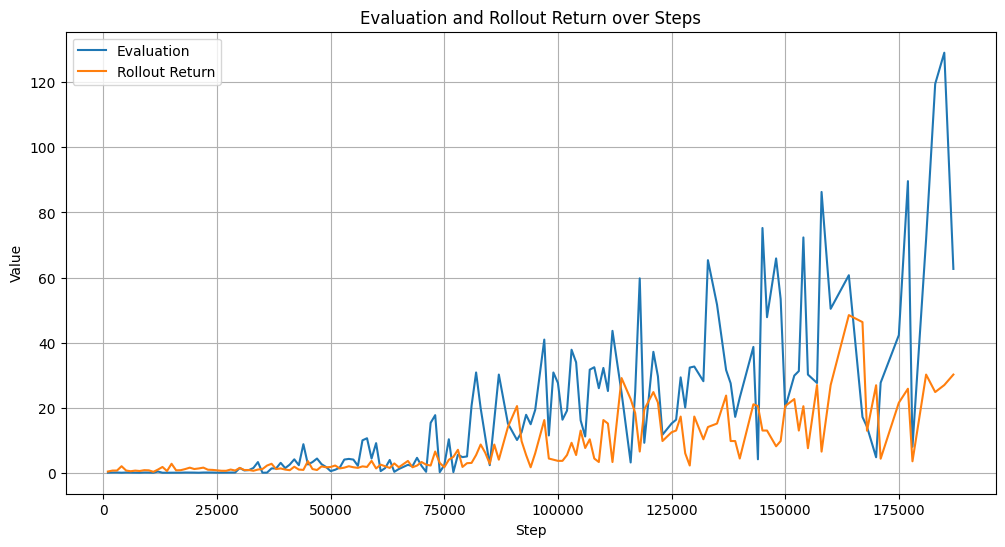

In [19]:
import re
import matplotlib.pyplot as plt

def parse_logs(log_text):
    # Регулярное выражение для парсинга нужных значений
    log_pattern = re.compile(
        r"DQN_online_[\d]+: epoch=\d+ step=(\d+) epoch=\d+ metrics={.*'rollout_return': ([\d.-]+), 'evaluation': ([\d.-]+).*} step=\d+"
    )

    # Инициализация словаря для хранения значений
    log_data = {
        'step': [],
        'evaluation': [],
        'rollout_return': []
    }

    # Парсинг логов
    for match in log_pattern.finditer(log_text):
        step = int(match.group(1))
        rollout_return = float(match.group(2))
        evaluation = float(match.group(3))

        log_data['step'].append(step)
        log_data['rollout_return'].append(rollout_return)
        log_data['evaluation'].append(evaluation)

    return log_data

log_data = parse_logs(logs_5)

print(log_data)

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(log_data['step'], log_data['evaluation'], label='Evaluation')
plt.plot(log_data['step'], log_data['rollout_return'], label='Rollout Return')
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Evaluation and Rollout Return over Steps')
plt.legend()
plt.grid(True)
plt.show()

Видно, что алгоритм показывает растущий return на evaluation. Скачки связаны с видом среды в которую попадает агаент. В данной реализации агент сталкивается с тем, что его скорость при взмахе крыльев может быть недостаточна в случае если у двух последовательных труб зазор на сильно разном уровне. В коллаб pygame не рендерится, но по ссылке на репозиотрй можно посмотреть как алгоритм играет. Надо запустить файл: flapping_bird_gym.py.

По обучению и гиперпараметрам: Перебрал большое количество комбинаций, остановлися на текущей. В файле auxilary_1.ipynb в репозитории можно посмотреть другие более-менее удачные комбинации.

Изменялись: batch_size = [4,64], lr = [1e-5,1e-3], buffer size, exploration strategy...


In [25]:
# Импортируем вашу среду
# from flapping_bird_gym import FlappingBirdEnv
import matplotlib.pyplot as plt
import torch

def ai_learn():
    env = FlappingBirdEnvNumerical(FPS=30, logs=False, JUMP_VEL= -3, Bird = Bird)
    eval_env = FlappingBirdEnvNumerical(FPS=30, logs=False, JUMP_VEL= -3, Bird = Bird)

    if torch.cuda.is_available():
        print("GPU доступен.")
        print("GPU Name:", torch.cuda.get_device_name(0))
        device = "cuda:0"
    else:
        print("GPU не доступен.")
        device = "cpu:0"

    # setup algorithm
    cql = d3rlpy.algos.DiscreteCQLConfig(
        batch_size=32,
        learning_rate=4e-5,
        target_update_interval=500,
        gamma=1,
    ).create(device=device)

    # experience replay buffer
    buffer = d3rlpy.dataset.create_fifo_replay_buffer(limit=100000, env=env)

    # setup explorers
    explorer = d3rlpy.algos.LinearDecayEpsilonGreedy(start_epsilon=1.0,
                                        end_epsilon=0.01,
                                        duration=200000)

    cql.fit_online(
        env,
        buffer,
        explorer,
        n_steps=300000,  # train for 100K steps
        eval_env=eval_env,
        n_steps_per_epoch=1000,  # evaluation is performed every 1K steps
        update_start_step=1000,  # parameter update starts after 1K steps
    )

    # Сохраняем обученную модель
    cql.save_model('cql_flappy_bird.pt')
    env.close()

ai_learn()

GPU доступен.
GPU Name: Tesla T4
2024-05-20 20:27.45 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('int64')], shape=[()]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(5,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[[1]])
2024-05-20 20:27.45 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.DISCRETE: 2>
2024-05-20 20:27.45 [info     ] Action size has been automatically determined. action_size=2
2024-05-20 20:27.45 [info     ] Directory is created at d3rlpy_logs/DiscreteCQL_online_20240520202745
2024-05-20 20:27.45 [debug    ] Building model...             
2024-05-20 20:27.45 [debug    ] Model has been built.         
2024-05-20 20:27.45 [info     ] Parameters                     params={'observation_shape': [5], 'action_size': 2, 'config': {'type': 'discrete_cql', 'params': {'batch_size': 32, 'gamma': 1, 'observation_scaler': {'type': 'none', 'params': {}}, 'a

  0%|          | 0/300000 [00:00<?, ?it/s]

2024-05-20 20:27.46 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_online_20240520202745/model_1000.d3
2024-05-20 20:27.46 [info     ] DiscreteCQL_online_20240520202745: epoch=1 step=1000 epoch=1 metrics={'time_inference': 0.0005944857597351075, 'time_environment_step': 0.0006252610683441162, 'time_step': 0.0012523055076599122, 'rollout_return': 0.6204999999999972, 'evaluation': 0.027000000000000017} step=1000
2024-05-20 20:27.54 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_online_20240520202745/model_2000.d3
2024-05-20 20:27.54 [info     ] DiscreteCQL_online_20240520202745: epoch=2 step=2000 epoch=2 metrics={'time_inference': 0.0007035176753997802, 'time_environment_step': 0.0007380187511444092, 'time_sample_batch': 0.000657466173171997, 'time_algorithm_update': 0.0048874254226684575, 'loss': 0.6977645046710969, 'td_loss': 0.0052290450921136655, 'conservative_loss': 0.6925354598164558, 'time_step': 0.007048660039901734, 'rollout_return': 0.62087

KeyboardInterrupt: 

In [ ]:
# Импортируем вашу среду
# from flapping_bird_gym import FlappingBirdEnv
import matplotlib.pyplot as plt
import torch

def ai_learn():
    env = FlappingBirdEnvNumerical(FPS=30, logs=False, JUMP_VEL= -3, Bird = Bird)
    eval_env = FlappingBirdEnvNumerical(FPS=30, logs=False, JUMP_VEL= -3, Bird = Bird)

    if torch.cuda.is_available():
        print("GPU доступен.")
        print("GPU Name:", torch.cuda.get_device_name(0))
        device = "cuda:0"
    else:
        print("GPU не доступен.")
        device = "cpu:0"

    # setup algorithm
    bc = d3rlpy.algos.DiscreteBCConfig(
        batch_size=32,
        learning_rate=4e-5,
        # target_update_interval=500,
        gamma=1,
    ).create(device=device)

    # experience replay buffer
    buffer = d3rlpy.dataset.create_fifo_replay_buffer(limit=100000, env=env)

    # setup explorers
    explorer = d3rlpy.algos.LinearDecayEpsilonGreedy(start_epsilon=1.0,
                                        end_epsilon=0.01,
                                        duration=200000)

    bc.fit_online(
        env,
        buffer,
        explorer,
        n_steps=300000,  # train for 100K steps
        eval_env=eval_env,
        n_steps_per_epoch=1000,  # evaluation is performed every 1K steps
        update_start_step=1000,  # parameter update starts after 1K steps
    )

    # Сохраняем обученную модель
    bc.save_model('bc_flappy_bird.pt')
    env.close()

ai_learn()

GPU доступен.
GPU Name: Tesla T4
2024-05-20 20:35.46 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('int64')], shape=[()]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(5,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[[1]])
2024-05-20 20:35.46 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.DISCRETE: 2>
2024-05-20 20:35.46 [info     ] Action size has been automatically determined. action_size=2
2024-05-20 20:35.46 [info     ] Directory is created at d3rlpy_logs/DiscreteBC_online_20240520203546
2024-05-20 20:35.46 [debug    ] Building model...             
2024-05-20 20:35.49 [debug    ] Model has been built.         
2024-05-20 20:35.49 [info     ] Parameters                     params={'observation_shape': [5], 'action_size': 2, 'config': {'type': 'discrete_bc', 'params': {'batch_size': 32, 'gamma': 1, 'observation_scaler': {'type': 'none', 'params': {}}, 'act

  0%|          | 0/300000 [00:00<?, ?it/s]

2024-05-20 20:35.52 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_online_20240520203546/model_1000.d3
2024-05-20 20:35.52 [info     ] DiscreteBC_online_20240520203546: epoch=1 step=1000 epoch=1 metrics={'time_inference': 0.0016652579307556152, 'time_environment_step': 0.0007406759262084961, 'time_step': 0.0024443564414978027, 'rollout_return': 0.6203749999999972, 'evaluation': 0.02900000000000002} step=1000
2024-05-20 20:35.58 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_online_20240520203546/model_2000.d3
2024-05-20 20:35.58 [info     ] DiscreteBC_online_20240520203546: epoch=2 step=2000 epoch=2 metrics={'time_inference': 0.0008432075977325439, 'time_environment_step': 0.0006851954460144043, 'time_sample_batch': 0.0006268651485443115, 'time_algorithm_update': 0.0032917716503143312, 'loss': 0.932876244187355, 'time_step': 0.005511154413223266, 'rollout_return': 0.3225555555555547, 'evaluation': 0.027000000000000017} step=2000
2024-05-20 20:36.04 [

KeyboardInterrupt: 

Попрбовав 2 доплнительных алгоритма cql и bc видим, что оба в обоих агент не обучается. Это связано с тем, что оба алгоритма заточены под оффлайн обучение и и хорошо работают на большой выборке как положительных, так и отрицательных действиях агента. В данном случае в онлайн режиме агент практически не совершает корректных действий (т.к. им надо сначала обучиться, а вероятность их случайного воспроизведения очень мала).
Графики смысла строить нет, видно что rollout return и evaluation стабильно меньше 1. Т.е. агент не преодолевает даже 1 трубу.